# Dwarf Mass Limits & Optical Velocity

# Project Notes

NearbyGalaxies - master table (does not include optical velocities)
NearbyGalaxiesSE - identifies HI data source, fills in velocity reference, notes

These are based on McConnachie 2012 with additions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from astropy.table import Table
import astropy.coordinates as coord
import astropy.units as u

In [2]:
#Names only thing changed
NearbyGalaxies_master = pd.read_csv("./NearbyGalaxies_full_clean.dat", delim_whitespace=True ,header=(0))

In [3]:
NearbyGalaxies_trim = pd.read_csv("./NearbyGalaxiese_trim_clean.dat", delim_whitespace=True ,header=(0))

In [4]:
#We'll take these from master and eliminate duplicates
NearbyGalaxies_trim.drop(columns = ['RA1','RA2','RA3','Dec1','Dec2','Dec3','vh(km/s)','Data','MHI','mystery1','mystery2','mystery3','mystery4'],inplace = True)

In [5]:
#Just some cleaning up and clarifying names
NearbyGalaxies_master.rename(columns={'RA':'RA_hr','e1':'RA_min','e2':'RA_sec','Dec':'Dec_deg','e3':'Dec_arcmin','e4':'Dec_arcsec','(m-M)o':'m-M','e5':'m-M_err_pos','e6':'m-M_err_neg','e7':'Vmag_err_pos','e8':'Vmag_err_neg','e9':'rh_err_pos','e10':'rh_err_neg','e11':'vsig_err_pos','e12':'vsig_err_neg','e13':'vrot_s_err_pos','e14':'vrot_s_err_neg','e15':'vsig_g_err_pos','e16':'vsig_g_err_neg'},inplace = True)

In [6]:
#Combine to be comprehensive
NearbyGalaxies = pd.merge(NearbyGalaxies_master, NearbyGalaxies_trim, how='left', on='GalaxyName')

In [7]:
NearbyGalaxies

,GalaxyName,RA_hr,RA_min,RA_sec,Dec_deg,Dec_arcmin,Dec_arcsec,EB-V,m-M,m-M_err_pos,...,MHI,Data,Key,vsig_g,vsig_g_err_pos,vsig_g_err_neg,vrot_g,notes,M-m,Notes
0,#TheGalaxy,17,45,40.0,-29,0,28,9.999,99.99,9.99,...,99.90,x,u,99.9,99.9,99.9,999.9,NaN,NaN,NaN
1,#*CanisMajor,7,12,35.0,-27,40,0,0.264,14.29,0.30,...,99.90,x,u,99.9,99.9,99.9,999.9,NaN,NaN,NaN
2,SagittariusdSph,18,55,19.5,-30,32,43,0.153,17.10,0.15,...,0.00,x,u,0.0,0.0,0.0,0.0,NaN,17.10,(I don’t understand where the limit in GP or M...
3,TucanaIII,23,56,36.0,-59,36,0,9.999,17.01,0.16,...,99.90,x,u,99.9,99.9,99.9,999.9,NaN,17.01,"- Simon et al. 2017 V_hel = -102 km/s, velocit..."
4,DracoII,15,52,47.6,64,33,55,0.016,16.90,0.30,...,99.90,x,u,99.9,99.9,99.9,999.9,NaN,16.90,"- Martin et al. 2016 V_hel -347 km/s, dispersi..."
5,Segue(I),10,7,4.0,16,4,55,0.031,16.80,0.20,...,1.67,gs,u,0.0,0.0,0.0,0.0,NaN,16.80,148+18s.mir stdev (0.04K/9.1K/Jy)*5 = 0.02 Jy ...
6,Reticulum2,3,35,42.1,-54,2,57,9.999,17.40,0.20,...,99.90,x,u,99.9,99.9,99.9,999.9,NaN,17.40,"- Walker et al., Koposov et al. (2015), V_hel=..."
7,CetusII,1,17,52.8,-17,25,12,9.999,17.38,0.19,...,99.90,x,u,99.9,99.9,99.9,999.9,NaN,17.38,NEW not seeing velocity ref for this one
8,TriangulumII,2,13,17.4,36,10,42,0.081,17.40,0.10,...,2.20,gs,u,99.9,99.9,99.9,999.9,NaN,17.40,"36+34s.mir Martin et al. v_hel = -384 km/s, d..."
9,UrsaMajorII,8,51,30.0,63,7,48,0.094,17.50,0.30,...,0.00,x,u,0.0,0.0,0.0,0.0,NaN,17.50,"130.0 60.0 CAR CAR_H07.fits stdev 0.02K, if b..."


In [8]:
NearbyGalaxies.columns

Index(['GalaxyName', 'RA_hr', 'RA_min', 'RA_sec', 'Dec_deg', 'Dec_arcmin',
       'Dec_arcsec', 'EB-V', 'm-M', 'm-M_err_pos', 'm-M_err_neg', 'vh(km/s)',
       'Vmag', 'Vmag_err_pos', 'Vmag_err_neg', 'PA', 'e=1-b/a', 'muVo',
       'rh(')', 'rh_err_pos', 'rh_err_neg', 'vsig_s', 'vsig_err_pos',
       'vsig_err_neg', 'vrot_s', 'vrot_s_err_pos', 'vrot_s_err_neg', 'MHI',
       'Data', 'Key', 'vsig_g', 'vsig_g_err_pos', 'vsig_g_err_neg', 'vrot_g',
       'notes', 'M-m', 'Notes'],
      dtype='object')

In [9]:
#add in newly discovered Dwarfs
new_dwarfs = pd.read_csv('./newdwarfs.txt', delim_whitespace=True ,header=(0),comment='#')

In [10]:
#Just some cleaning up and clarifying names
new_dwarfs.rename(columns={'ra1':'RA_hr','ra2':'RA_min','ra3':'RA_sec','dec1':'Dec_deg','dec2':'Dec_arcmin','dec3':'Dec_arcsec','(m-M)o':'m-M','e5':'m-M_err_pos','e6':'m-M_err_neg'},inplace = True)

In [11]:
new_dwarfs

,GalaxyName,RA_hr,RA_min,RA_sec,Dec_deg,Dec_arcmin,Dec_arcsec,ra,dec,EB-V,m-M,m-M_err_pos,m-M_err_neg,vh(km/s),Notes
0,CetusIII,2.0,5.0,19.4,-4.0,16.0,12.0,31.3292,-4.2700,NaN,22.00,0.20,0.10,NaN,http://adsabs.harvard.edu/abs/2018PASJ...70S..18H
1,DESJ0225+0304,2.0,25.0,42.4,3.0,4.0,10.0,36.4250,3.0694,NaN,16.88,0.06,0.05,NaN,http://adsabs.harvard.edu/abs/2017MNRAS.468...97L
2,PictorII,6.0,44.0,43.2,-59.0,53.0,49.0,101.1792,-59.8969,0.107,18.30,0.12,0.15,NaN,http://adsabs.harvard.edu/abs/2016ApJ...833L...5D
3,VirgoI,12.0,0.0,9.6,0.0,40.0,48.0,180.0417,-0.6800,NaN,19.70,0.30,0.20,NaN,http://adsabs.harvard.edu/abs/2016ApJ...832...21H
4,HydrusI,2.0,29.0,33.3,-79.0,18.0,32.0,-0.6800,-79.3089,NaN,17.20,0.04,0.04,80.4,http://adsabs.harvard.edu/abs/2018MNRAS.479.5343K
5,CarinaII,NaN,NaN,NaN,NaN,NaN,NaN,114.1066,-57.9991,NaN,17.79,0.05,0.05,477.2,http://adsabs.harvard.edu/abs/2018MNRAS.475.5085T
6,CarinaIII,NaN,NaN,NaN,NaN,NaN,NaN,114.6298,-57.8997,NaN,17.22,0.10,0.10,284.6,http://adsabs.harvard.edu/abs/2018MNRAS.475.5085T
7,CraterII,NaN,NaN,NaN,NaN,NaN,NaN,177.3100,-18.4130,NaN,20.35,0.02,0.02,87.5,http://adsabs.harvard.edu/abs/2016MNRAS.459.2370T
8,AquariusII,NaN,NaN,NaN,NaN,NaN,NaN,338.4813,-9.3274,NaN,20.16,0.07,0.07,-71.1,http://adsabs.harvard.edu/abs/2016MNRAS.463..712T


In [12]:
NearbyGalaxies.rename(columns={'notes':'note'},inplace = True)

In [13]:
#merge new dwarfs into gals_merged df
frames = [NearbyGalaxies, new_dwarfs]
gals_merged = pd.concat(frames, sort=False)
gals_merged.reset_index(drop=True, inplace=True)
gals_merged

,GalaxyName,RA_hr,RA_min,RA_sec,Dec_deg,Dec_arcmin,Dec_arcsec,EB-V,m-M,m-M_err_pos,...,Key,vsig_g,vsig_g_err_pos,vsig_g_err_neg,vrot_g,note,M-m,Notes,ra,dec
0,#TheGalaxy,17.0,45.0,40.0,-29.0,0.0,28.0,9.999,99.99,9.99,...,u,99.9,99.9,99.9,999.9,NaN,NaN,NaN,NaN,NaN
1,#*CanisMajor,7.0,12.0,35.0,-27.0,40.0,0.0,0.264,14.29,0.30,...,u,99.9,99.9,99.9,999.9,NaN,NaN,NaN,NaN,NaN
2,SagittariusdSph,18.0,55.0,19.5,-30.0,32.0,43.0,0.153,17.10,0.15,...,u,0.0,0.0,0.0,0.0,NaN,17.10,(I don’t understand where the limit in GP or M...,NaN,NaN
3,TucanaIII,23.0,56.0,36.0,-59.0,36.0,0.0,9.999,17.01,0.16,...,u,99.9,99.9,99.9,999.9,NaN,17.01,"- Simon et al. 2017 V_hel = -102 km/s, velocit...",NaN,NaN
4,DracoII,15.0,52.0,47.6,64.0,33.0,55.0,0.016,16.90,0.30,...,u,99.9,99.9,99.9,999.9,NaN,16.90,"- Martin et al. 2016 V_hel -347 km/s, dispersi...",NaN,NaN
5,Segue(I),10.0,7.0,4.0,16.0,4.0,55.0,0.031,16.80,0.20,...,u,0.0,0.0,0.0,0.0,NaN,16.80,148+18s.mir stdev (0.04K/9.1K/Jy)*5 = 0.02 Jy ...,NaN,NaN
6,Reticulum2,3.0,35.0,42.1,-54.0,2.0,57.0,9.999,17.40,0.20,...,u,99.9,99.9,99.9,999.9,NaN,17.40,"- Walker et al., Koposov et al. (2015), V_hel=...",NaN,NaN
7,CetusII,1.0,17.0,52.8,-17.0,25.0,12.0,9.999,17.38,0.19,...,u,99.9,99.9,99.9,999.9,NaN,17.38,NEW not seeing velocity ref for this one,NaN,NaN
8,TriangulumII,2.0,13.0,17.4,36.0,10.0,42.0,0.081,17.40,0.10,...,u,99.9,99.9,99.9,999.9,NaN,17.40,"36+34s.mir Martin et al. v_hel = -384 km/s, d...",NaN,NaN
9,UrsaMajorII,8.0,51.0,30.0,63.0,7.0,48.0,0.094,17.50,0.30,...,u,0.0,0.0,0.0,0.0,NaN,17.50,"130.0 60.0 CAR CAR_H07.fits stdev 0.02K, if b...",NaN,NaN


# Calculate distances from distance Modulus

In [14]:
gals_merged['dist_pc'] = np.sqrt((100*100**((gals_merged['m-M']/5))))

In [15]:
gals_merged['dist_kpc'] = gals_merged['dist_pc']/1000

In [16]:
gals_merged['dist_mpc'] = gals_merged['dist_pc']/1000000

In [17]:
gals_merged[['GalaxyName','Data','MHI','m-M','M-m','dist_mpc']]

,GalaxyName,Data,MHI,m-M,M-m,dist_mpc
0,#TheGalaxy,x,99.90,99.99,NaN,9.954054e+14
1,#*CanisMajor,x,99.90,14.29,NaN,7.211075e-03
2,SagittariusdSph,x,0.00,17.10,17.10,2.630268e-02
3,TucanaIII,x,99.90,17.01,17.01,2.523481e-02
4,DracoII,x,99.90,16.90,16.90,2.398833e-02
5,Segue(I),gs,1.67,16.80,16.80,2.290868e-02
6,Reticulum2,x,99.90,17.40,17.40,3.019952e-02
7,CetusII,x,99.90,17.38,17.38,2.992265e-02
8,TriangulumII,gs,2.20,17.40,17.40,3.019952e-02
9,UrsaMajorII,x,0.00,17.50,17.50,3.162278e-02


# Check Mass Limits on Each Dwarf

Here I go through the table one by one and check mass limits where necessary with the appropriate information from the tables folder depending on the data source associated with that galaxy, and also check the galfa data for detections

In [18]:
#to see notes without them being truncated
pd.set_option("display.max_colwidth", 10000)

# Load contents of table files for each data source/case combination

In [19]:
galfa_unresolved_undetected = pd.read_csv('./tables/galfa_unresolved_undetected_clean.txt', delim_whitespace=True ,header=(0),comment='#')
galfa_unresolved_undetected

,GalaxyName,rh,MHI,std30_med_g,std30_med_h,MHI_g,MHI_h
0,BootesIII,99.99,99.9,0.037923,NaN,17.09138,NaN
1,CanesVenaticiII,1.60,0.0,0.078217,0.013089,519.00588,474.21009
2,PiscesII,1.10,99.9,0.037429,NaN,321.42495,NaN
3,Pegasus3,1.30,99.9,NaN,NaN,NaN,NaN
4,AndromedaXI,0.71,0.0,0.069377,0.012132,9707.05599,9268.51441
5,AndromedaXX,0.53,99.9,0.075920,0.017230,10819.92472,13407.35803
6,AndromedaXIII,0.78,0.0,0.076044,0.018760,13897.46464,18719.38047
7,AndromedaXIV,1.70,0.0,0.029043,0.016321,4752.33774,14581.57512
8,AndromedaXII,1.20,0.0,0.070827,0.016336,15851.40892,19962.45423
9,AndromedaXXIX,1.70,99.9,0.036159,NaN,5012.81372,NaN


In [20]:
galfa_resolved_undetected = pd.read_csv('./tables/galfa_resolved_undetected_table_clean.txt', delim_whitespace=True ,header=(0),comment='#')
galfa_resolved_undetected

,GalaxyName,med_std,v_-5,v_-4,v_-3,v_-2,v_-1,v_0,v_+1,v_+2,v_+3,v_+4,v_+5,MHI_limit
0,Segue(I),0.017123,0.020954,0.020997,0.019659,0.018380,0.017681,0.017123,0.016192,0.014794,0.013582,0.012936,0.012643,9.33124
1,TriangulumII,0.033360,0.032310,0.035480,0.041173,0.044659,0.043152,0.037963,0.033360,0.031326,0.029874,0.027878,0.025896,31.59340
2,BootesII,0.020185,0.026547,0.024216,0.020185,0.016058,0.013231,0.013089,0.015978,0.019443,0.021502,0.022890,0.023712,36.42430
3,SegueII,0.019513,0.019513,0.021121,0.021463,0.019757,0.017380,0.016138,0.016102,0.016821,0.018150,0.019659,0.020971,24.36050
4,ComaBerenices,0.011513,0.017993,0.018037,0.017272,0.016089,0.014207,0.011513,0.009089,0.007597,0.006588,0.006316,0.006658,22.78040
5,Bootes(I),0.024946,0.020448,0.019055,0.019703,0.021678,0.023773,0.025247,0.025994,0.026299,0.026131,0.025314,0.024946,114.12000
6,Hercules,0.028245,0.027603,0.028245,0.029470,0.030828,0.031628,0.031415,0.029572,0.026164,0.023573,0.024793,0.027962,509.70000
7,LeoIV,0.018579,0.023945,0.019971,0.017264,0.017018,0.018579,0.019500,0.019310,0.018564,0.018563,0.019044,0.018400,458.54800
8,CanesVenaticu(I),0.016252,0.024369,0.021633,0.018487,0.016273,0.015959,0.016252,0.016039,0.015467,0.015233,0.015825,0.016702,800.34100
9,LeoI,0.031631,0.029137,0.030867,0.033413,0.036775,0.037608,0.034692,0.030318,0.027769,0.028897,0.031631,0.032785,2110.97000


In [21]:
hi4pi_resolved_undetected = pd.read_csv('./tables/hi4pi_resolved_undetected_table_clean.txt', delim_whitespace=True ,header=(0),comment='#')
hi4pi_resolved_undetected

,GalaxyName,med_std,v_-5,v_-4,v_-3,v_-2,v_-1,v_0,v_+1,v_+2,v_+3,v_+4,v_+5
0,UrsaMajorII,0.33041,0.29192,0.29070,0.29266,0.39312,0.52351,0.51525,0.36989,0.29312,0.32788,0.34514,0.33041
1,Tucana2,0.11744,0.13279,0.13210,0.09946,0.07456,0.08875,0.11781,0.13724,0.12786,0.10454,0.10228,0.11744
2,Draco,0.21153,0.12404,0.10974,0.13890,0.15178,0.21153,0.28788,0.29272,0.25904,0.24986,0.21300,0.14644
3,Sextans(I),0.57736,0.42631,0.48201,0.57736,0.65398,0.65606,0.67766,0.70233,0.59833,0.49953,0.56530,0.52435
4,UrsaMajor(I),1.12877,0.75418,0.87294,0.96666,1.03453,1.08105,1.12877,1.20459,1.30527,1.38664,1.41153,1.41080


In [22]:
hi4pi_unresolved_undetected = pd.read_csv('./tables/hi4pi_unresolved_undetected_clean.txt', delim_whitespace=True ,header=(0),comment='#')
hi4pi_unresolved_undetected

,GalaxyName,rh,MHI,std30_med,Notes
0,TucanaIII,6.00,99.90,0.020382,NaN
1,DracoII,2.70,99.90,0.017329,NaN
2,Reticulum2,3.64,99.90,0.020559,NaN
3,CetusII,1.90,99.90,NaN,no v
4,Willman1,2.30,0.00,0.019376,NaN
5,TucanaIV,9.10,99.90,NaN,no v
6,GrusII,6.00,99.90,NaN,no v
7,TucanaV,1.00,99.90,NaN,no v
8,SagittariusII,2.00,99.90,NaN,no v
9,HorologiumII,2.09,99.90,NaN,no v


In [23]:
hi4pi_novelocity = pd.read_csv('./tables/hi4pi_novelocity_clean.txt', delim_whitespace=True ,header=(0),comment='#')
hi4pi_novelocity

,GalaxyName,med
0,CetusII,0.020
1,TucanaIV,0.010
2,GrusII,0.020
3,TucanaV,0.018
4,SagittariusII,0.020
5,HorologiumII,0.018
6,Eridanus3,0.020
7,Phoenix2,0.017
8,ReticulumIII,0.017
9,Indus1,0.020


In [24]:
galfa_novelocity = pd.read_csv('./tables/galfa_novelocity_clean.txt', delim_whitespace=True ,header=(0),comment='#')
galfa_novelocity

,GalaxyName,med
0,Pegasus3,0.05


Sanity check on conversion factor (e.g. from all_notebooks/Unresolved Undetected.ipynb):
 MHI = (2.36x10**5)(D**2 mpc)(Stot) for unresolved

x = 2.361e5 dmpc = dist(objname)/1e3 #mpc tflux = 0.030336279 #put in by hand because every table different/not exactly formatted stot = tflux10 #tflux always multiplied by 10km/s

#galfa: 9.1 k/Jy hi4pi: .6 jy/k g = 1/9.1 h = .6

MHI = x(dmpc**2)(stot*g) #multiply by 'h' or 'g' (hi4pi or galfa) to convert to janskys y = MHI '%.5f'%(y) #show 5 decimal points

Do any of the dwarfs have velocities in Simon 2019 that aren't listed in our list?


In [25]:
add_unresolved = pd.read_csv('./tables/unresolved_undetected_result.txt', delim_whitespace=True,comment='#')
add_unresolved

,GalaxyName,med_std_30arcmin(K)
0,CetusIII,0.0189
1,DESJ0225+0304,0.0967
2,PictorII,0.0193
3,VirgoI,0.0825
4,CarinaII,0.0238
5,CarinaIII,0.0185
6,AquariusII,0.0212
7,HydrusI,0.0231
8,AndromedaXXV,0.0619
9,Willman1,0.3600


These are the ones added later by Yong

In [26]:
add_hi4pi = pd.read_csv('./tables/check_hi4pi_limits_result.txt', delim_whitespace=True ,header=(0),comment='#')
add_hi4pi

,GalaxyName,med_std_30arcmin(K),med_std_1deg(K),Note
0,TriangulumII,0.0188,0.0203,TriangulumII_HasVelTable_hi4pi.npy
1,LeoI,0.0224,0.0246,LeoI_HasVelTable_hi4pi.npy
2,AndromedaXIX,0.0360,0.0762,AndromedaXIX_HasVelTable_hi4pi.npy
3,AndromedaXVI,0.0244,0.0284,AndromedaXVI_HasVelTable_hi4pi.npy


In [27]:
add_resolved = pd.read_csv('./tables/resolved_undetected_hi4pi.txt', delim_whitespace=True ,header=(0),comment='#')
add_resolved

,GalaxyName,RA,DEC,PA,e=1-b/a,rh(arcmins),vh(m/s),HI4PI,npix
0,UrsaMajorII,8h51m30.0s,63d7m48s,98.0,0.63,16.00,-116500,CAR_H07,25
1,Tucana2,22h51m55.1s,-58d34m8s,107.0,0.39,9.83,-129000,CAR_B18,13
2,Draco,17h20m12.4s,57d54m55s,89.0,0.31,10.00,-291000,CAR_H13,17
3,Sextans(I),10h13m3.0s,-1d36m53s,56.0,0.35,27.80,224200,CAR_E08,77
4,UrsaMajor(I),10h34m52.8s,51d55m12s,71.0,0.80,11.30,-55300,CAR_H08,11


In [28]:
#just to check a specific galaxy
gals_merged[gals_merged['GalaxyName'] == "AndromedaXVI"]

,GalaxyName,RA_hr,RA_min,RA_sec,Dec_deg,Dec_arcmin,Dec_arcsec,EB-V,m-M,m-M_err_pos,...,vsig_g_err_neg,vrot_g,note,M-m,Notes,ra,dec,dist_pc,dist_kpc,dist_mpc
85,AndromedaXVI,0.0,59.0,29.8,32.0,22.0,36.0,0.067,23.39,0.19,...,0.0,0.0,202),23.39,012+34,NaN,NaN,476430.986805,476.430987,0.476431


In [29]:
#make some blank columns
gals_merged['MHI_computed'] = np.nan
gals_merged['MHI_source'] = np.nan
gals_merged['MHI_type'] = np.nan
#gals_merged['type_color'] = np. nan
#gals_merged['source_color'] = np. nan
gals_merged['1sigma'] = np.nan
gals_merged['rh_subtable'] = np.nan
gals_merged['MHI_method'] = np.nan
#galfa, galfa_smoothed, hi4pi, hi4pi_resolved, literature
gals_merged['npix'] = np.nan
gals_merged['GUU'] = np.nan
gals_merged['GRU'] = np.nan
gals_merged['HUU'] = np.nan
gals_merged['HRU'] = np.nan
gals_merged['GNV'] = np.nan
gals_merged['HNV'] = np.nan
gals_merged['LIT'] = np.nan
gals_merged['1sigma_GUU'] = np.nan
gals_merged['1sigma_GRU'] = np.nan
gals_merged['1sigma_HUU'] = np.nan
gals_merged['1sigma_HRU'] = np.nan
gals_merged['1sigma_GNV'] = np.nan
gals_merged['1sigma_HNV'] = np.nan

In [30]:
#Add npix where relevant
for i, row in add_resolved.iterrows():
    gals_merged.loc[gals_merged['GalaxyName'] == add_resolved['GalaxyName'][i], 'npix'] = add_resolved['npix'][i]

In [31]:
#Calculate mass limits for any possible cases
for i, row in gals_merged.iterrows():
    print('Now calculating all possibilities for: ',gals_merged['GalaxyName'][i])

    for j, row in galfa_unresolved_undetected.iterrows():
        if (galfa_unresolved_undetected['GalaxyName'][j] == gals_merged['GalaxyName'][i]):
            gals_merged['rh_subtable'][i] = galfa_unresolved_undetected['rh'][j]
            galfa_limit = np.nan
            galfa_limit = galfa_unresolved_undetected['std30_med_g'][j]*5*(1/9.1)*10*2.36E5*(gals_merged['dist_mpc'][i]*gals_merged['dist_mpc'][i])
            hi4pi_limit = galfa_unresolved_undetected['std30_med_h'][j]*5*0.6*10*2.36E5*(gals_merged['dist_mpc'][i]*gals_merged['dist_mpc'][i])
            if ((np.isnan(hi4pi_limit)) | (galfa_limit < hi4pi_limit)): 
                gals_merged.loc[gals_merged['GalaxyName'] == galfa_unresolved_undetected['GalaxyName'][j], '1sigma_GUU'] = galfa_unresolved_undetected['std30_med_g'][j]
                gals_merged.loc[gals_merged['GalaxyName'] == galfa_unresolved_undetected['GalaxyName'][j], 'GUU'] = galfa_unresolved_undetected['std30_med_g'][j]*5*(1/9.1)*10*2.36E5*(gals_merged['dist_mpc'][i]*gals_merged['dist_mpc'][i])
                print('galfa limit is lower')
            elif((np.isnan(galfa_limit)) | (galfa_limit > hi4pi_limit)):
                gals_merged.loc[gals_merged['GalaxyName'] == galfa_unresolved_undetected['GalaxyName'][j], '1sigma_HUU'] = galfa_unresolved_undetected['std30_med_h'][j]
                gals_merged.loc[gals_merged['GalaxyName'] == galfa_unresolved_undetected['GalaxyName'][j], 'HUU'] = galfa_unresolved_undetected['std30_med_h'][j]*5*0.6*10*2.36E5*(gals_merged['dist_mpc'][i]*gals_merged['dist_mpc'][i])
                print('hi4pi limit is lower')
            else:
                print('Houston, we have a problem')
            print("GUU",galfa_unresolved_undetected['GalaxyName'][j],gals_merged['GalaxyName'][i],gals_merged['GUU'][i])
    
    for k, row in galfa_resolved_undetected.iterrows():
        if (galfa_resolved_undetected['GalaxyName'][k] == gals_merged['GalaxyName'][i]):
            gals_merged.loc[gals_merged['GalaxyName'] == galfa_resolved_undetected['GalaxyName'][k], '1sigma_GRU'] = galfa_resolved_undetected['med_std'][k]
            gals_merged.loc[gals_merged['GalaxyName'] == galfa_resolved_undetected['GalaxyName'][k], 'GRU'] = galfa_resolved_undetected['med_std'][k]*5*(0.44)*10*2.36E5*(gals_merged['dist_mpc'][i]*gals_merged['dist_mpc'][i])
            print("GRU",galfa_resolved_undetected['GalaxyName'][k],gals_merged['GalaxyName'][i],gals_merged['GRU'][i])
    
    for l, row in hi4pi_resolved_undetected.iterrows():
        if (hi4pi_resolved_undetected['GalaxyName'][l] == gals_merged['GalaxyName'][i]):
            gals_merged.loc[gals_merged['GalaxyName'] == hi4pi_resolved_undetected['GalaxyName'][l], 'rh_subtable'] = hi4pi_unresolved_undetected['rh'][l]
            gals_merged.loc[gals_merged['GalaxyName'] == hi4pi_resolved_undetected['GalaxyName'][l], '1sigma_HRU'] = hi4pi_resolved_undetected['med_std'][l]
            gals_merged.loc[gals_merged['GalaxyName'] == hi4pi_resolved_undetected['GalaxyName'][l], 'HRU'] = (hi4pi_resolved_undetected['med_std'][l]*5*0.6*10*2.36E5*(gals_merged['dist_mpc'][i]*gals_merged['dist_mpc'][i]))/gals_merged['npix'][i]
            print("HRU",hi4pi_resolved_undetected['GalaxyName'][l],gals_merged['GalaxyName'][i],gals_merged['HRU'][i])
    
    for m, row in hi4pi_unresolved_undetected.iterrows():
        if (hi4pi_unresolved_undetected['GalaxyName'][m] == gals_merged['GalaxyName'][i]):
            gals_merged.loc[gals_merged['GalaxyName'] == hi4pi_unresolved_undetected['GalaxyName'][m], 'rh_subtable'] = hi4pi_unresolved_undetected['rh'][m]
            gals_merged.loc[gals_merged['GalaxyName'] == hi4pi_unresolved_undetected['GalaxyName'][m], '1sigma_HUU'] = hi4pi_unresolved_undetected['std30_med'][m]
            gals_merged.loc[gals_merged['GalaxyName'] == hi4pi_unresolved_undetected['GalaxyName'][m], 'HUU'] = hi4pi_unresolved_undetected['std30_med'][m]*5*0.6*10*2.36E5*(gals_merged['dist_mpc'][i]*gals_merged['dist_mpc'][i])
            print("HUU",hi4pi_unresolved_undetected['GalaxyName'][m],gals_merged['GalaxyName'][i],gals_merged['HUU'][i])
    
    for n, row in galfa_novelocity.iterrows():
        if (galfa_novelocity['GalaxyName'][n] == gals_merged['GalaxyName'][i]):
            gals_merged.loc[gals_merged['GalaxyName'] == galfa_novelocity['GalaxyName'][n], '1sigma_GNV'] = galfa_novelocity['med'][n]
            gals_merged.loc[gals_merged['GalaxyName'] == galfa_novelocity['GalaxyName'][n], 'GNV'] = galfa_novelocity['med'][n]*5*(1/9.1)*10*2.36E5*(gals_merged['dist_mpc'][i]*gals_merged['dist_mpc'][i])
            print("GNV",galfa_novelocity['GalaxyName'][n],gals_merged['GalaxyName'][i],gals_merged['GNV'][i])
                  
    for o, row in hi4pi_novelocity.iterrows():
        if (hi4pi_novelocity['GalaxyName'][o] == gals_merged['GalaxyName'][i]):
            gals_merged.loc[gals_merged['GalaxyName'] == hi4pi_novelocity['GalaxyName'][o], '1sigma_HNV'] = hi4pi_novelocity['med'][o]
            gals_merged.loc[gals_merged['GalaxyName'] == hi4pi_novelocity['GalaxyName'][o], 'HNV'] = hi4pi_novelocity['med'][o]*5*0.6*10*2.36E5*(gals_merged['dist_mpc'][i]*gals_merged['dist_mpc'][i])
            print("HNV",hi4pi_novelocity['GalaxyName'][o],gals_merged['GalaxyName'][i],gals_merged['HNV'][i])

    for p, row in add_unresolved.iterrows():
        if (add_unresolved['GalaxyName'][p] == gals_merged['GalaxyName'][i]):
            gals_merged.loc[gals_merged['GalaxyName'] == add_unresolved['GalaxyName'][p], '1sigma'] = add_unresolved['med_std_30arcmin(K)'][p]
            if(add_unresolved['GalaxyName'][p] in ['DESJ0225+0304','VirgoI']):
                gals_merged.loc[gals_merged['GalaxyName'] == add_unresolved['GalaxyName'][p], 'GUU'] = add_unresolved['med_std_30arcmin(K)'][p]*5*(1/9.1)*10*2.36E5*(gals_merged['dist_mpc'][i]*gals_merged['dist_mpc'][i])
                gals_merged.loc[gals_merged['GalaxyName'] == add_unresolved['GalaxyName'][p], '1sigma_GUU'] = add_unresolved['med_std_30arcmin(K)'][p]
            else:
                gals_merged.loc[gals_merged['GalaxyName'] == add_unresolved['GalaxyName'][p], 'HUU'] = add_unresolved['med_std_30arcmin(K)'][p]*5*0.6*10*2.36E5*(gals_merged['dist_mpc'][i]*gals_merged['dist_mpc'][i])
                gals_merged.loc[gals_merged['GalaxyName'] == add_unresolved['GalaxyName'][p], '1sigma_HUU'] = add_unresolved['med_std_30arcmin(K)'][p]

            print("HUU_ADD",add_unresolved['GalaxyName'][p],gals_merged['GalaxyName'][i],gals_merged['HUU'][i])

    for q, row in add_hi4pi.iterrows():
        if (add_hi4pi['GalaxyName'][q] == gals_merged['GalaxyName'][i]):
            #if ((add_hi4pi['med_std_30arcmin(K)'][q]*5*0.6*10*2.36E5*(gals_merged['dist_mpc'][i]*gals_merged['dist_mpc'][i])) < gals_merged['MHI_computed'][i]):
            gals_merged.loc[gals_merged['GalaxyName'] == add_hi4pi['GalaxyName'][q], '1sigma_HUU'] = add_hi4pi['med_std_30arcmin(K)'][q]
            gals_merged.loc[gals_merged['GalaxyName'] == add_hi4pi['GalaxyName'][q], 'HUU'] = add_hi4pi['med_std_30arcmin(K)'][q]*5*0.6*10*2.36E5*(gals_merged['dist_mpc'][i]*gals_merged['dist_mpc'][i])
            print("HUU_ADD",add_hi4pi['GalaxyName'][q],gals_merged['GalaxyName'][i],gals_merged['HUU'][i])
                      
    if((gals_merged['MHI'][i] != 99.90) & (gals_merged['MHI'][i] != 0) & (gals_merged['MHI'][i] != np.nan) & (gals_merged['Data'][i] == 'x') & (gals_merged['GalaxyName'][i] not in ['Sculptor','Fornax','Phoenix'])):
        gals_merged.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'LIT'] = (gals_merged['MHI'][i])*1000000
        print("LIT",gals_merged['GalaxyName'][i],gals_merged['MHI'][i],gals_merged['LIT'][i])

Now calculating all possibilities for:  #TheGalaxy
Now calculating all possibilities for:  #*CanisMajor
Now calculating all possibilities for:  SagittariusdSph
Now calculating all possibilities for:  TucanaIII
HUU TucanaIII TucanaIII 91.89114490090122
Now calculating all possibilities for:  DracoII
HUU DracoII DracoII 70.60196425864088
Now calculating all possibilities for:  Segue(I)
GRU Segue(I) Segue(I) 46.65675611252086
Now calculating all possibilities for:  Reticulum2
HUU Reticulum2 Reticulum2 132.74892698458365
Now calculating all possibilities for:  CetusII
HUU CetusII CetusII nan
HNV CetusII CetusII 126.78365080182249
Now calculating all possibilities for:  TriangulumII
GRU TriangulumII TriangulumII 157.96494687194073
HUU_ADD TriangulumII TriangulumII 121.39229076162876
Now calculating all possibilities for:  UrsaMajorII
HRU UrsaMajorII UrsaMajorII 93.57211199999998
Now calculating all possibilities for:  BootesII
GRU BootesII BootesII 182.12243050936553
Now calculating all pos

/Users/janagrc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


HNV GrusII GrusII 397.24940313396297
Now calculating all possibilities for:  LMC
LIT LMC 460.0 460000000.0
Now calculating all possibilities for:  TucanaV
HUU TucanaV TucanaV nan
HNV TucanaV TucanaV 388.42373747819016
Now calculating all possibilities for:  Tucana2
HRU Tucana2 Tucana2 211.79024266227847
Now calculating all possibilities for:  SagittariusII
HUU SagittariusII SagittariusII nan
HNV SagittariusII SagittariusII 635.4234721453141
Now calculating all possibilities for:  SMC
LIT SMC 460.0 460000000.0
Now calculating all possibilities for:  Bootes(I)
GRU Bootes(I) Bootes(I) 570.6050379717902
Now calculating all possibilities for:  Draco
HRU Draco Draco 506.9397025941739
Now calculating all possibilities for:  UrsaMinor
HUU UrsaMinor UrsaMinor 598.5852364615366
Now calculating all possibilities for:  HorologiumII
HUU HorologiumII HorologiumII nan
HNV HorologiumII HorologiumII 775.0072456295995
Now calculating all possibilities for:  Horologium1
HUU Horologium1 Horologium1 764.32

LIT Aquarius 4.1 4099999.9999999995
Now calculating all possibilities for:  Tucana
HUU Tucana Tucana 85395.81245612683
Now calculating all possibilities for:  SagittariusdIrr
LIT SagittariusdIrr 8.8 8800000.0
Now calculating all possibilities for:  UGC4879
LIT UGC4879 0.95 950000.0
Now calculating all possibilities for:  AntliaB
LIT AntliaB 0.28 280000.0
Now calculating all possibilities for:  NGC3109
LIT NGC3109 450.0 450000000.0
Now calculating all possibilities for:  SextansB
LIT SextansB 51.0 51000000.0
Now calculating all possibilities for:  Antlia
LIT Antlia 0.73 730000.0
Now calculating all possibilities for:  SextansA
LIT SextansA 77.0 77000000.0
Now calculating all possibilities for:  HIZSS3(A)
LIT HIZSS3(A) 14.0 14000000.0
Now calculating all possibilities for:  HIZSS3B
LIT HIZSS3B 2.6 2600000.0
Now calculating all possibilities for:  LeoP
LIT LeoP 0.94 940000.0
Now calculating all possibilities for:  ESO410-G005
LIT ESO410-G005 0.73 730000.0
Now calculating all possibilities

In [32]:
#Compare limits and chose lowest, assign MHI_Computed, 1sigma, etc
for i, row in gals_merged.iterrows():
    print('Now calculating for: ',gals_merged['GalaxyName'][i])
    if((gals_merged['MHI'][i] != 99.90) & (gals_merged['MHI'][i] != 0) & (gals_merged['MHI'][i] != np.nan) & (gals_merged['Data'][i] == 'x') & (gals_merged['GalaxyName'][i] not in ['Sculptor','Fornax'])):
        gals_merged.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'MHI_computed'] = gals_merged['LIT'][i]
    else:
        gals_merged.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'MHI_computed'] = np.nanmin([gals_merged['GUU'][i],gals_merged['GRU'][i],gals_merged['HUU'][i],gals_merged['HRU'][i],gals_merged['GNV'][i],gals_merged['HNV'][i]])
    
    print(gals_merged['MHI_computed'][i],gals_merged['GUU'][i],gals_merged['GRU'][i],gals_merged['HUU'][i],gals_merged['HRU'][i],gals_merged['GNV'][i],gals_merged['HNV'][i],gals_merged['LIT'][i])
    if(np.isnan(gals_merged['MHI_computed'][i])):
        print('WARNING: ' + gals_merged['GalaxyName'][i] + ' HAS NO MHI COMPUTED VALUE')
    
    if(gals_merged['MHI_computed'][i] == gals_merged['GUU'][i]):
        gals_merged.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'MHI_method'] = 'galfa_unresolved_undetected'
        gals_merged.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'MHI_source'] = 'GALFA-HI'
        gals_merged.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'MHI_type'] = 'upper_limit'
        gals_merged.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], '1sigma'] = gals_merged['1sigma_GUU'][i]
        print(gals_merged['GalaxyName'][i],'GUU')

    if(gals_merged['MHI_computed'][i] == gals_merged['GRU'][i]):
        gals_merged.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'MHI_method'] = 'galfa_resolved_undetected'
        gals_merged.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'MHI_source'] = 'GALFA-HI'
        gals_merged.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'MHI_type'] = 'upper_limit'
        gals_merged.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], '1sigma'] = gals_merged['1sigma_GRU'][i]
        print(gals_merged['GalaxyName'][i],'GRU')

    if(gals_merged['MHI_computed'][i] == gals_merged['HUU'][i]):
        gals_merged.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'MHI_method'] = 'hi4pi_unresolved_undetected'
        gals_merged.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'MHI_source'] = 'HI4PI'
        gals_merged.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'MHI_type'] = 'upper_limit'
        gals_merged.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], '1sigma'] = gals_merged['1sigma_HUU'][i]
        print(gals_merged['GalaxyName'][i],'HUU')

    if(gals_merged['MHI_computed'][i] == gals_merged['HRU'][i]):
        gals_merged.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'MHI_method'] = 'hi4pi_resolved_undetected'
        gals_merged.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'MHI_source'] = 'HI4PI'
        gals_merged.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'MHI_type'] = 'upper_limit'
        gals_merged.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], '1sigma'] = gals_merged['1sigma_HRU'][i]
        print(gals_merged['GalaxyName'][i],'HRU')

    if(gals_merged['MHI_computed'][i] == gals_merged['GNV'][i]):
        gals_merged.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'MHI_method'] = 'galfa_no_velocity'
        gals_merged.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'MHI_source'] = 'GALFA-HI'
        gals_merged.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'MHI_type'] = 'upper_limit'
        gals_merged.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], '1sigma'] = gals_merged['1sigma_GNV'][i]
        print(gals_merged['GalaxyName'][i],'GNV')
        
    if(gals_merged['MHI_computed'][i] == gals_merged['HNV'][i]):
        gals_merged.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'MHI_method'] = 'hi4pi_no_velocity'
        gals_merged.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'MHI_source'] = 'HI4PI'
        gals_merged.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'MHI_type'] = 'upper_limit'
        gals_merged.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], '1sigma'] = gals_merged['1sigma_HNV'][i]
        print(gals_merged['GalaxyName'][i],'HNV')

    
    if((gals_merged['MHI'][i] != 99.90) & (gals_merged['MHI'][i] != 0) & (gals_merged['MHI'][i] != np.nan) & (gals_merged['Data'][i] == 'x') & (gals_merged['GalaxyName'][i] not in ['Sculptor','Fornax','Phoenix'])):
        gals_merged.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'MHI_computed'] = (gals_merged['MHI'][i])*1000000
        gals_merged.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'MHI_source'] = 'Literature'
        gals_merged.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'MHI_type'] = 'detected_mass'
        gals_merged.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'MHI_method'] = 'literature'
        gals_merged.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'LIT'] = (gals_merged['MHI'][i])*1000000   
        print(gals_merged['GalaxyName'][i],'LIT')
     

Now calculating for:  #TheGalaxy
nan nan nan nan nan nan nan nan
Now calculating for:  #*CanisMajor
nan nan nan nan nan nan nan nan
Now calculating for:  SagittariusdSph
nan nan nan nan nan nan nan nan
Now calculating for:  TucanaIII
91.89114490090122 nan nan 91.89114490090122 nan nan nan nan
TucanaIII HUU
Now calculating for:  DracoII
70.60196425864088 nan nan 70.60196425864088 nan nan nan nan
DracoII HUU
Now calculating for:  Segue(I)
46.65675611252086 nan 46.65675611252086 nan nan nan nan nan
Segue(I) GRU
Now calculating for:  Reticulum2
132.74892698458365 nan nan 132.74892698458365 nan nan nan nan
Reticulum2 HUU
Now calculating for:  CetusII
126.78365080182249 nan nan nan nan nan 126.78365080182249 nan
CetusII HNV
Now calculating for:  TriangulumII
121.39229076162876 nan 157.96494687194073 121.39229076162876 nan nan nan nan
TriangulumII HUU
Now calculating for:  UrsaMajorII
93.57211199999998 nan nan nan 93.57211199999998 nan nan nan
UrsaMajorII HRU
Now calculating for:  BootesII
18

/Users/janagrc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: All-NaN axis encountered
  import sys


HorologiumII HNV
Now calculating for:  Horologium1
764.3207540811753 nan nan 764.3207540811753 nan nan nan nan
Horologium1 HUU
Now calculating for:  Eridanus3
1074.145846241324 nan nan nan nan nan 1074.145846241324 nan
Eridanus3 HNV
Now calculating for:  Phoenix2
832.6877565980333 nan nan nan nan nan 832.6877565980333 nan
Phoenix2 HNV
Now calculating for:  Sculptor
3216.0910941879756 nan nan 3216.0910941879756 nan nan nan nan
Sculptor HUU
Now calculating for:  Sextans(I)
391.7321577994745 nan nan nan 391.7321577994745 nan nan nan
Sextans(I) HRU
Now calculating for:  ReticulumIII
1010.3740397747455 nan nan nan nan nan 1010.3740397747455 nan
ReticulumIII HNV
Now calculating for:  Indus1
1416.0000000000002 nan nan nan nan nan 1416.0000000000002 nan
Indus1 HNV
Now calculating for:  UrsaMajor(I)
6811.551286571539 nan nan nan 6811.551286571539 nan nan nan
UrsaMajor(I) HRU
Now calculating for:  Grus1
2165.8529076975533 nan nan 2165.8529076975533 nan nan nan nan
Grus1 HUU
Now calculating for: 

HIZSS3B LIT
Now calculating for:  LeoP
940000.0 nan nan nan nan nan nan 940000.0
LeoP LIT
Now calculating for:  ESO410-G005
730000.0 nan nan nan nan nan nan 730000.0
ESO410-G005 LIT
Now calculating for:  KKR25
605836.340434887 nan nan 605836.340434887 nan nan nan nan
KKR25 HUU
Now calculating for:  NGC55
1300000000.0 nan nan nan nan nan nan 1300000000.0
NGC55 LIT
Now calculating for:  ESO294-G010
340000.0 nan nan nan nan nan nan 340000.0
ESO294-G010 LIT
Now calculating for:  NGC300
1800000000.0 nan nan nan nan nan nan 1800000000.0
NGC300 LIT
Now calculating for:  IC5152
87000000.0 nan nan nan nan nan nan 87000000.0
IC5152 LIT
Now calculating for:  KKH98
6600000.0 nan nan nan nan nan nan 6600000.0
KKH98 LIT
Now calculating for:  UKS2323-326
17000000.0 nan nan nan nan nan nan 17000000.0
UKS2323-326 LIT
Now calculating for:  KK258
869026.1108125001 nan nan 869026.1108125001 nan nan nan nan
KK258 HUU
Now calculating for:  KKR3
2500000.0 nan nan nan nan nan nan 2500000.0
KKR3 LIT
Now calcul

In [33]:
gals_merged

,GalaxyName,RA_hr,RA_min,RA_sec,Dec_deg,Dec_arcmin,Dec_arcsec,EB-V,m-M,m-M_err_pos,...,HRU,GNV,HNV,LIT,1sigma_GUU,1sigma_GRU,1sigma_HUU,1sigma_HRU,1sigma_GNV,1sigma_HNV
0,#TheGalaxy,17.0,45.0,40.0,-29.0,0.0,28.0,9.999,99.99,9.99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,#*CanisMajor,7.0,12.0,35.0,-27.0,40.0,0.0,0.264,14.29,0.30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SagittariusdSph,18.0,55.0,19.5,-30.0,32.0,43.0,0.153,17.10,0.15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TucanaIII,23.0,56.0,36.0,-59.0,36.0,0.0,9.999,17.01,0.16,...,NaN,NaN,NaN,NaN,NaN,NaN,0.020382,NaN,NaN,NaN
4,DracoII,15.0,52.0,47.6,64.0,33.0,55.0,0.016,16.90,0.30,...,NaN,NaN,NaN,NaN,NaN,NaN,0.017329,NaN,NaN,NaN
5,Segue(I),10.0,7.0,4.0,16.0,4.0,55.0,0.031,16.80,0.20,...,NaN,NaN,NaN,NaN,NaN,0.017123,NaN,NaN,NaN,NaN
6,Reticulum2,3.0,35.0,42.1,-54.0,2.0,57.0,9.999,17.40,0.20,...,NaN,NaN,NaN,NaN,NaN,NaN,0.020559,NaN,NaN,NaN
7,CetusII,1.0,17.0,52.8,-17.0,25.0,12.0,9.999,17.38,0.19,...,NaN,NaN,126.783651,NaN,NaN,NaN,NaN,NaN,NaN,0.020
8,TriangulumII,2.0,13.0,17.4,36.0,10.0,42.0,0.081,17.40,0.10,...,NaN,NaN,NaN,NaN,NaN,0.033360,0.018800,NaN,NaN,NaN
9,UrsaMajorII,8.0,51.0,30.0,63.0,7.0,48.0,0.094,17.50,0.30,...,93.572112,NaN,NaN,NaN,NaN,NaN,NaN,0.33041,NaN,NaN


In [34]:
#These guys we don't want to include, so I'm just nuking them here
gals_merged = gals_merged[gals_merged.GalaxyName != 'NGC300']
gals_merged = gals_merged[gals_merged.GalaxyName != 'NGC55']

# Add values from McConnachie Table that were not in the starting master table

In [35]:
#This is the table brought in from the McConnachie paper latex table
mcconnachie = Table.read('./tables/mcconnachie_clean.tex')
mcconnachie = Table.to_pandas(mcconnachie)

In [36]:
mcconnachie

,GalaxyName,M_star,sigma_star_kms,sigma_star_kms_err,v_r_star,v_r_star_err,M_HI,sigma_HI,sigma_HI_err,v_r_HI,v_r_HI_err,M_dyn_r_h,References,Comments
0,CanisMajor,49,20.0,3.0,---,---,---,---,---,---,---,---,(1),HI measurements complex due to location!
1,SagittariusdSph,21,11.4,0.7,N/A,N/A,N/A\tablenotemark{b},N/A,N/A,N/A,N/A,190,(2) (3) (4) (5),none
2,Segue(I),0.00034,3.9\tablenotemark{c},0.8,N/A,N/A,N/A,N/A,N/A,N/A,N/A,0.26,(6) (5),"Stellar velocity gradient constrained to $<5$\,km\,s$^{-1}$ at 90\% confidence"
3,UrsaMajorII,0.0041,6.7,1.4,N/A,N/A,N/A,N/A,N/A,N/A,N/A,3.9,(7) (5),"Velocity difference of $8.4 \pm 1.4$km\,s$^{-1}$ between stars in the east and west"
4,BootesII,0.0010,10.5,7.4,---,---,N/A,N/A,N/A,N/A,N/A,3.3,(8) (5),none
5,SegueII,0.00086,3.4,$^{+2.5}_{-1.2}$,---,---,---,---,---,---,---,0.23,(9),none
6,Willman1,0.0010,4.3,$^{+2.3}_{-1.3}$,---,---,N/A,N/A,N/A,N/A,N/A,0.27,(10) (5),none
7,ComaBerenices,0.0037,4.6,0.8,N/A,N/A,N/A,N/A,N/A,N/A,N/A,0.94,(7) (5),"Stellar velocity gradient of $5.5 \pm 1.2$km\,s$^{-1}$\,degree$^{-1}$"
8,BootesIII,0.017,14.0,3.2,---,---,---,---,---,---,---,---,(11),none
9,LMC,1500,20.2,0.5,49.8,15.9,460,15.8,0.2,63.0,3.0,NaN,(12) (13) (14),"Stellar velocities based on Carbon stars; HI boundaries between LMC, SMC, bridge and interface regions not clearly defined"


In [37]:
#Merge M_star, M_dyn_r_h, from Mcconnachie to main df
gals_merged = pd.merge(gals_merged, mcconnachie[['GalaxyName','M_star','M_dyn_r_h']], how='left', on='GalaxyName')

# Merge in missing values (e.g. coordinates) that Mary added for new dwarfs

In [38]:
gals_merged

,GalaxyName,RA_hr,RA_min,RA_sec,Dec_deg,Dec_arcmin,Dec_arcsec,EB-V,m-M,m-M_err_pos,...,HNV,LIT,1sigma_GUU,1sigma_GRU,1sigma_HUU,1sigma_HRU,1sigma_GNV,1sigma_HNV,M_star,M_dyn_r_h
0,#TheGalaxy,17.0,45.0,40.0,-29.0,0.0,28.0,9.999,99.99,9.99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,#*CanisMajor,7.0,12.0,35.0,-27.0,40.0,0.0,0.264,14.29,0.30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SagittariusdSph,18.0,55.0,19.5,-30.0,32.0,43.0,0.153,17.10,0.15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,190
3,TucanaIII,23.0,56.0,36.0,-59.0,36.0,0.0,9.999,17.01,0.16,...,NaN,NaN,NaN,NaN,0.020382,NaN,NaN,NaN,NaN,NaN
4,DracoII,15.0,52.0,47.6,64.0,33.0,55.0,0.016,16.90,0.30,...,NaN,NaN,NaN,NaN,0.017329,NaN,NaN,NaN,NaN,NaN
5,Segue(I),10.0,7.0,4.0,16.0,4.0,55.0,0.031,16.80,0.20,...,NaN,NaN,NaN,0.017123,NaN,NaN,NaN,NaN,0.00034,0.26
6,Reticulum2,3.0,35.0,42.1,-54.0,2.0,57.0,9.999,17.40,0.20,...,NaN,NaN,NaN,NaN,0.020559,NaN,NaN,NaN,NaN,NaN
7,CetusII,1.0,17.0,52.8,-17.0,25.0,12.0,9.999,17.38,0.19,...,126.783651,NaN,NaN,NaN,NaN,NaN,NaN,0.020,NaN,NaN
8,TriangulumII,2.0,13.0,17.4,36.0,10.0,42.0,0.081,17.40,0.10,...,NaN,NaN,NaN,0.033360,0.018800,NaN,NaN,NaN,NaN,NaN
9,UrsaMajorII,8.0,51.0,30.0,63.0,7.0,48.0,0.094,17.50,0.30,...,NaN,NaN,NaN,NaN,NaN,0.33041,NaN,NaN,0.0041,3.9


In [39]:
new_dwarf_values = pd.read_csv('./tables/new_dwarf_added_values.csv',header=(0),comment='#')
new_dwarf_values

,GalaxyName,RA_hr,RA_min,RA_sec,Dec_deg,Dec_arcmin,Dec_arcsec,EB-V,m-M,m-M_err,...,vsig_g,vsig_g_err,vrot_g,Notes,dist_kpc,MHI_computed,MHI_source,MHI_type,1sigma,notes/image/limit
0,CetusIII,2,5,19.4,-4,16,12,NaN,22.00,0.20,...,NaN,NaN,NaN,http://adsabs.harvard.edu/abs/2018PASJ...70S..18H,NaN,NaN,NaN,NaN,NaN,NaN
1,DESJ0225+0304,2,25,42.4,3,4,10,NaN,16.88,0.06,...,NaN,NaN,NaN,http://adsabs.harvard.edu/abs/2017MNRAS.468...97L,NaN,NaN,NaN,NaN,NaN,NaN
2,PictorII,6,44,43.2,-59,53,49,0.107,18.30,0.12,...,NaN,NaN,NaN,http://adsabs.harvard.edu/abs/2016ApJ...833L...5D,NaN,NaN,NaN,NaN,NaN,NaN
3,VirgoI,12,0,9.6,0,40,48,19.700,19.70,0.30,...,NaN,NaN,NaN,http://adsabs.harvard.edu/abs/2016ApJ...832...21H,NaN,NaN,NaN,NaN,NaN,NaN
4,HydrusI,2,29,33.3,-79,18,32,NaN,17.20,0.04,...,NaN,NaN,NaN,http://adsabs.harvard.edu/abs/2018MNRAS.479.5343K,NaN,NaN,NaN,NaN,NaN,NaN
5,CarinaII,7,36,25.5,-57,59,57,NaN,17.79,0.05,...,NaN,NaN,NaN,http://adsabs.harvard.edu/abs/2018MNRAS.475.5085T,NaN,NaN,NaN,NaN,NaN,"ok, peak in Yong's other plot?"
6,CarinaIII,7,38,31.1,-57,53,59,NaN,17.22,0.10,...,NaN,NaN,NaN,http://adsabs.harvard.edu/abs/2018MNRAS.475.5085T,NaN,NaN,NaN,NaN,NaN,ok
7,CraterII,11,49,14.4,-18,24,47,NaN,20.35,0.02,...,NaN,NaN,NaN,http://adsabs.harvard.edu/abs/2016MNRAS.459.2370T,NaN,NaN,NaN,NaN,NaN,ok
8,AquariusII,22,33,55.5,-9,19,39,NaN,20.16,0.07,...,NaN,NaN,NaN,http://adsabs.harvard.edu/abs/2016MNRAS.463..712T,NaN,NaN,NaN,NaN,NaN,"ok, near edge"


In [42]:
test1 = gals_merged

In [43]:
#iteratively fill list

for i, row in test1.iterrows():
    for j, row in new_dwarf_values.iterrows():
        if (new_dwarf_values['GalaxyName'][j] == test1['GalaxyName'][i]):
            test1.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'RA_hr'] = new_dwarf_values['RA_hr'][j]
            test1.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'RA_min'] = new_dwarf_values['RA_min'][j]
            test1.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'RA_sec'] = new_dwarf_values['RA_sec'][j]
            test1.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'Dec_deg'] = new_dwarf_values['Dec_deg'][j]
            test1.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'Dec_arcmin'] = new_dwarf_values['Dec_arcmin'][j]
            test1.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'Dec_arcsec'] = new_dwarf_values['Dec_arcsec'][j]
            test1.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'EB-V'] = new_dwarf_values['EB-V'][j]
            test1.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'm-M'] = new_dwarf_values['m-M'][j]
            test1.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'm-M_err'] = new_dwarf_values['m-M_err'][j]
            test1.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'vh(km/s)'] = new_dwarf_values['vh(km/s)'][j]
            test1.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'Vmag'] = new_dwarf_values['Vmag'][j]
            test1.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'Vmag_err'] = new_dwarf_values['Vmag_err'][j]
            test1.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'PA'] = new_dwarf_values['PA'][j]
            test1.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'e=1-b/a'] = new_dwarf_values['e=1-b/a'][j]
            test1.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'rh(\')'] = new_dwarf_values['rh(\')'][j]
            test1.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'rh_err_pos'] = new_dwarf_values['rh_err_pos'][j]
            test1.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'rh_err_neg'] = new_dwarf_values['rh_err_neg'][j]
            test1.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'vsig_s'] = new_dwarf_values['vsig_s'][j]
            test1.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'vsig_err'] = new_dwarf_values['vsig_err'][j]
            test1.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'vrot_s'] = new_dwarf_values['vrot_s'][j]
            test1.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'MHI_mcconnachie'] = new_dwarf_values['MHI_mcconnachie'][j]
            test1.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'Data'] = new_dwarf_values['Data'][j]
            test1.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'Key'] = new_dwarf_values['Key'][j]
            test1.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'vsig_g'] = new_dwarf_values['vsig_g'][j]
            test1.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'vsig_g_err'] = new_dwarf_values['vsig_g_err'][j]

In [44]:
test1.RA_hr.fillna(new_dwarf_values.RA_hr, inplace=True)

In [45]:
test1.loc[test1['RA_hr'].isnull()]

,GalaxyName,RA_hr,RA_min,RA_sec,Dec_deg,Dec_arcmin,Dec_arcsec,EB-V,m-M,m-M_err_pos,...,1sigma_HRU,1sigma_GNV,1sigma_HNV,M_star,M_dyn_r_h,m-M_err,Vmag_err,vsig_err,MHI_mcconnachie,vsig_g_err


In [46]:
gals_merged = test1

In [47]:
gals_merged

,GalaxyName,RA_hr,RA_min,RA_sec,Dec_deg,Dec_arcmin,Dec_arcsec,EB-V,m-M,m-M_err_pos,...,1sigma_HRU,1sigma_GNV,1sigma_HNV,M_star,M_dyn_r_h,m-M_err,Vmag_err,vsig_err,MHI_mcconnachie,vsig_g_err
0,#TheGalaxy,17.0,45.0,40.0,-29.0,0.0,28.0,9.999,99.99,9.99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,#*CanisMajor,7.0,12.0,35.0,-27.0,40.0,0.0,0.264,14.29,0.30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SagittariusdSph,18.0,55.0,19.5,-30.0,32.0,43.0,0.153,17.10,0.15,...,NaN,NaN,NaN,21,190,NaN,NaN,NaN,NaN,NaN
3,TucanaIII,23.0,56.0,36.0,-59.0,36.0,0.0,9.999,17.01,0.16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,DracoII,15.0,52.0,47.6,64.0,33.0,55.0,0.016,16.90,0.30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Segue(I),10.0,7.0,4.0,16.0,4.0,55.0,0.031,16.80,0.20,...,NaN,NaN,NaN,0.00034,0.26,NaN,NaN,NaN,NaN,NaN
6,Reticulum2,3.0,35.0,42.1,-54.0,2.0,57.0,9.999,17.40,0.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,CetusII,1.0,17.0,52.8,-17.0,25.0,12.0,9.999,17.38,0.19,...,NaN,NaN,0.020,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,TriangulumII,2.0,13.0,17.4,36.0,10.0,42.0,0.081,17.40,0.10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,UrsaMajorII,8.0,51.0,30.0,63.0,7.0,48.0,0.094,17.50,0.30,...,0.33041,NaN,NaN,0.0041,3.9,NaN,NaN,NaN,NaN,NaN


# Normalized value columns

In [48]:
#create HI mass norm by M_star column
gals_merged['MHI/M_star'] = np.nan
for i, row in gals_merged.iterrows():
    if(gals_merged['M_star'][i] == '---'):
        gals_merged['M_star'][i] = np.nan
    gals_merged['MHI/M_star'][i] = gals_merged['MHI_computed'][i]/(pd.to_numeric(gals_merged['M_star'][i])*1000000)

/Users/janagrc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/janagrc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [49]:
#create HI mass norm by M_dyn column
gals_merged['MHI/M_dyn'] = np.nan
for i, row in gals_merged.iterrows():
    if(gals_merged['M_dyn_r_h'][i] == '---'):
        gals_merged['M_dyn_r_h'][i] = np.nan
    gals_merged['MHI/M_dyn'][i] = gals_merged['MHI_computed'][i]/(pd.to_numeric(gals_merged['M_dyn_r_h'][i])*1000000)

/Users/janagrc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/janagrc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [50]:
#check the columns to see the merge was OK
gals_merged.columns

Index(['GalaxyName', 'RA_hr', 'RA_min', 'RA_sec', 'Dec_deg', 'Dec_arcmin',
       'Dec_arcsec', 'EB-V', 'm-M', 'm-M_err_pos', 'm-M_err_neg', 'vh(km/s)',
       'Vmag', 'Vmag_err_pos', 'Vmag_err_neg', 'PA', 'e=1-b/a', 'muVo',
       'rh(')', 'rh_err_pos', 'rh_err_neg', 'vsig_s', 'vsig_err_pos',
       'vsig_err_neg', 'vrot_s', 'vrot_s_err_pos', 'vrot_s_err_neg', 'MHI',
       'Data', 'Key', 'vsig_g', 'vsig_g_err_pos', 'vsig_g_err_neg', 'vrot_g',
       'note', 'M-m', 'Notes', 'ra', 'dec', 'dist_pc', 'dist_kpc', 'dist_mpc',
       'MHI_computed', 'MHI_source', 'MHI_type', '1sigma', 'rh_subtable',
       'MHI_method', 'npix', 'GUU', 'GRU', 'HUU', 'HRU', 'GNV', 'HNV', 'LIT',
       '1sigma_GUU', '1sigma_GRU', '1sigma_HUU', '1sigma_HRU', '1sigma_GNV',
       '1sigma_HNV', 'M_star', 'M_dyn_r_h', 'm-M_err', 'Vmag_err', 'vsig_err',
       'MHI_mcconnachie', 'vsig_g_err', 'MHI/M_star', 'MHI/M_dyn'],
      dtype='object')

In [51]:
#FOR LATER
#These are absolute, should not be in same column mV. Save for later after absolute conversion
#new_dwarfs_mV = pd.read_csv('./tables/new_dwarfs_mV.txt', delim_whitespace=True ,comment='#')
#Add m_V values for new dwarfs. I grabbed these v quick and maybe should be checked
#for i, row in new_dwarfs_mV.iterrows():
    #gals_merged.loc[gals_merged['GalaxyName'] == new_dwarfs_mV['GalaxyName'][i], 'Vmag'] = new_dwarfs_mV['Vmag'][i]

In [52]:
#FOR LATER
#create HI mass norm by M_V column
#gals_merged['MHI/M_V'] = np.nan
#for i, row in gals_merged.iterrows():
#    gals_merged['MHI/M_V'][i] = gals_merged['MHI_computed'][i]/pd.to_numeric(gals_merged['Vmag'][i])

In [53]:
gals_merged[['GalaxyName','MHI_computed','Vmag','M_star','MHI/M_star','MHI/M_dyn']]

,GalaxyName,MHI_computed,Vmag,M_star,MHI/M_star,MHI/M_dyn
0,#TheGalaxy,NaN,99.90,NaN,NaN,NaN
1,#*CanisMajor,NaN,-0.10,NaN,NaN,NaN
2,SagittariusdSph,NaN,3.60,21,NaN,NaN
3,TucanaIII,9.189114e+01,14.60,NaN,NaN,NaN
4,DracoII,7.060196e+01,14.00,NaN,NaN,NaN
5,Segue(I),4.665676e+01,15.30,0.00034,0.137226,0.000179
6,Reticulum2,1.327489e+02,14.70,NaN,NaN,NaN
7,CetusII,1.267837e+02,17.40,NaN,NaN,NaN
8,TriangulumII,1.213923e+02,15.60,NaN,NaN,NaN
9,UrsaMajorII,9.357211e+01,13.30,0.0041,0.022822,0.000024


In [54]:
#Check mass limits for various cases for a single dwarf
gals_merged[(gals_merged['GalaxyName'] == 'TriangulumII')][['GalaxyName','GRU','GUU','HRU','HUU','GNV','HNV','MHI_computed','MHI_source','MHI_method']]

,GalaxyName,GRU,GUU,HRU,HUU,GNV,HNV,MHI_computed,MHI_source,MHI_method
8,TriangulumII,157.964947,NaN,NaN,121.392291,NaN,NaN,121.392291,HI4PI,hi4pi_unresolved_undetected


In [55]:
gals_merged[['GalaxyName','1sigma','MHI','MHI_computed','MHI_source','MHI_type','MHI_method','dist_kpc']]

,GalaxyName,1sigma,MHI,MHI_computed,MHI_source,MHI_type,MHI_method,dist_kpc
0,#TheGalaxy,NaN,99.90,NaN,NaN,NaN,NaN,9.954054e+17
1,#*CanisMajor,NaN,99.90,NaN,NaN,NaN,NaN,7.211075e+00
2,SagittariusdSph,NaN,0.00,NaN,NaN,NaN,NaN,2.630268e+01
3,TucanaIII,0.020382,99.90,9.189114e+01,HI4PI,upper_limit,hi4pi_unresolved_undetected,2.523481e+01
4,DracoII,0.017329,99.90,7.060196e+01,HI4PI,upper_limit,hi4pi_unresolved_undetected,2.398833e+01
5,Segue(I),0.017123,1.67,4.665676e+01,GALFA-HI,upper_limit,galfa_resolved_undetected,2.290868e+01
6,Reticulum2,0.020559,99.90,1.327489e+02,HI4PI,upper_limit,hi4pi_unresolved_undetected,3.019952e+01
7,CetusII,0.020000,99.90,1.267837e+02,HI4PI,upper_limit,hi4pi_no_velocity,2.992265e+01
8,TriangulumII,0.018800,2.20,1.213923e+02,HI4PI,upper_limit,hi4pi_unresolved_undetected,3.019952e+01
9,UrsaMajorII,0.330410,0.00,9.357211e+01,HI4PI,upper_limit,hi4pi_resolved_undetected,3.162278e+01


In [56]:
gals_merged[['GalaxyName','GRU','GUU','HRU','HUU','GNV','HNV','MHI_computed','MHI_method']]

,GalaxyName,GRU,GUU,HRU,HUU,GNV,HNV,MHI_computed,MHI_method
0,#TheGalaxy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,#*CanisMajor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SagittariusdSph,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TucanaIII,NaN,NaN,NaN,91.891145,NaN,NaN,9.189114e+01,hi4pi_unresolved_undetected
4,DracoII,NaN,NaN,NaN,70.601964,NaN,NaN,7.060196e+01,hi4pi_unresolved_undetected
5,Segue(I),46.656756,NaN,NaN,NaN,NaN,NaN,4.665676e+01,galfa_resolved_undetected
6,Reticulum2,NaN,NaN,NaN,132.748927,NaN,NaN,1.327489e+02,hi4pi_unresolved_undetected
7,CetusII,NaN,NaN,NaN,NaN,NaN,126.783651,1.267837e+02,hi4pi_no_velocity
8,TriangulumII,157.964947,NaN,NaN,121.392291,NaN,NaN,1.213923e+02,hi4pi_unresolved_undetected
9,UrsaMajorII,NaN,NaN,93.572112,NaN,NaN,NaN,9.357211e+01,hi4pi_resolved_undetected


In [57]:
#Check which ones didn't get an MHI_computed
gals_merged[gals_merged['MHI_computed'].isnull()]

,GalaxyName,RA_hr,RA_min,RA_sec,Dec_deg,Dec_arcmin,Dec_arcsec,EB-V,m-M,m-M_err_pos,...,1sigma_HNV,M_star,M_dyn_r_h,m-M_err,Vmag_err,vsig_err,MHI_mcconnachie,vsig_g_err,MHI/M_star,MHI/M_dyn
0,#TheGalaxy,17.0,45.0,40.0,-29.0,0.0,28.0,9.999,99.99,9.99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,#*CanisMajor,7.0,12.0,35.0,-27.0,40.0,0.0,0.264,14.29,0.30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SagittariusdSph,18.0,55.0,19.5,-30.0,32.0,43.0,0.153,17.10,0.15,...,NaN,21,190,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,#Andromeda,0.0,42.0,44.3,41.0,16.0,9.0,0.684,24.47,0.07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77,Triangulum,1.0,33.0,50.9,30.0,39.0,37.0,0.041,24.54,0.06,...,NaN,2900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89,Phoenix,1.0,51.0,6.3,-44.0,26.0,41.0,0.016,23.09,0.10,...,NaN,0.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138,CraterII,11.0,49.0,14.4,-18.0,24.0,47.0,NaN,20.35,0.02,...,NaN,NaN,NaN,0.02,0.1,0.3,NaN,NaN,NaN,NaN


In [58]:
gals_merged = gals_merged.reset_index(drop=True)

# Plots: Distance vs MHI computed (not normalized, includes all, N=135)

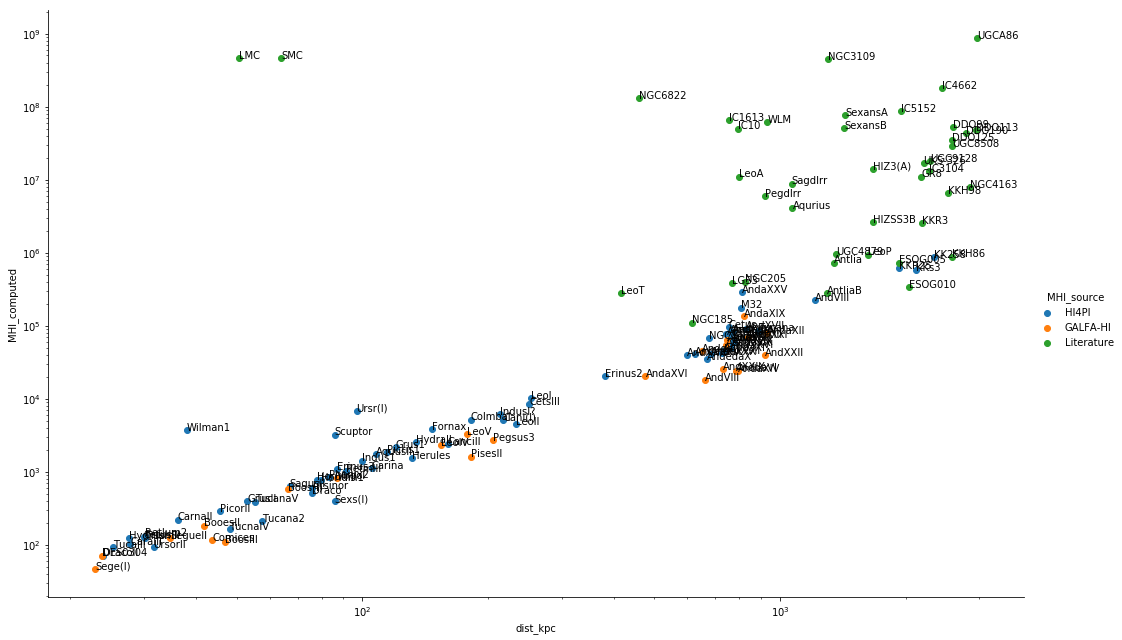

In [59]:
#log log with labels
fg = sb.FacetGrid(data=gals_merged, hue='MHI_source', height = 9,aspect=1.61)
fg.set(xscale="log", yscale="log")
fg.map(plt.scatter, 'dist_kpc', 'MHI_computed').add_legend()
count = 0
for i, txt in enumerate(gals_merged.GalaxyName):
    if((pd.notnull(gals_merged['dist_kpc'][i])) & (pd.notnull(gals_merged['MHI_computed'][i]))):
            if (len(txt) > 7):
                label = txt[0:3]+txt[-4:]
                count = count + 1
            else:
                label = txt
                count = count + 1
            plt.annotate(label,(gals_merged.dist_kpc.iat[i],gals_merged.MHI_computed.iat[i]))
plt.show()

In [60]:
print(count)

133


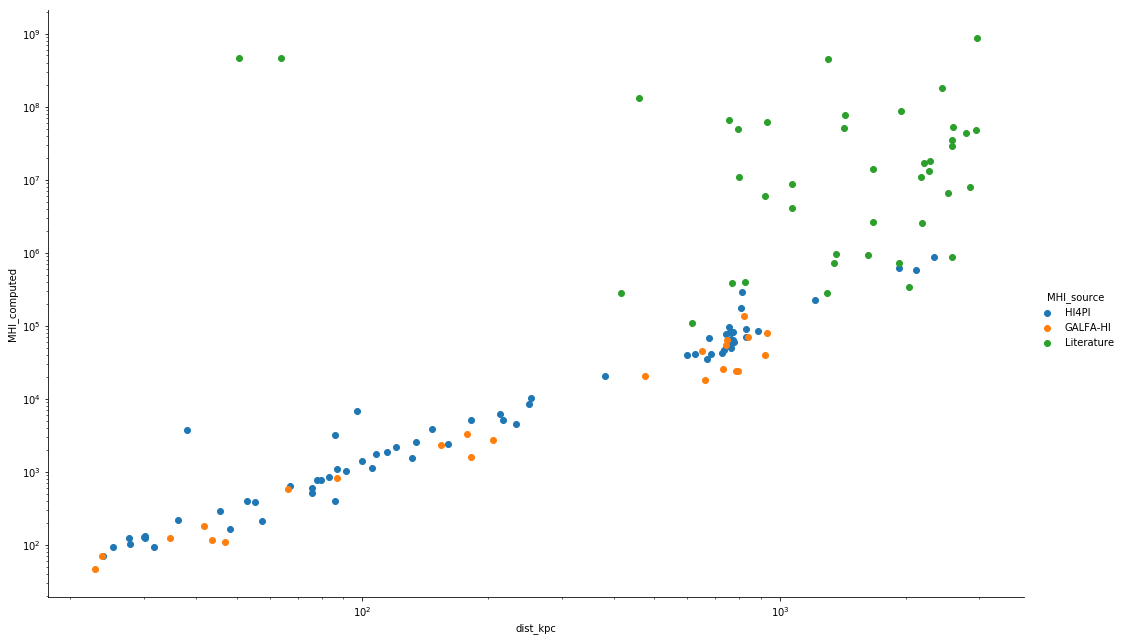

In [88]:
#log log without labels
fg = sb.FacetGrid(data=gals_merged, hue='MHI_source', height = 9,aspect=1.61)
fg.set(xscale="log", yscale="log")
fg.map(plt.scatter, 'dist_kpc', 'MHI_computed').add_legend()
#for i, txt in enumerate(gals_merged.GalaxyName):
#    if((pd.notnull(gals_merged['dist_kpc'][i])) & (pd.notnull(gals_merged['MHI_computed'][i]))):
#            if (len(txt) > 7):
#                label = txt[0:3]+txt[-4:]
#            else:
#                label = txt
#            plt.annotate(label,(gals_merged.dist_kpc.iat[i],gals_merged.MHI_computed.iat[i]))
plt.show()


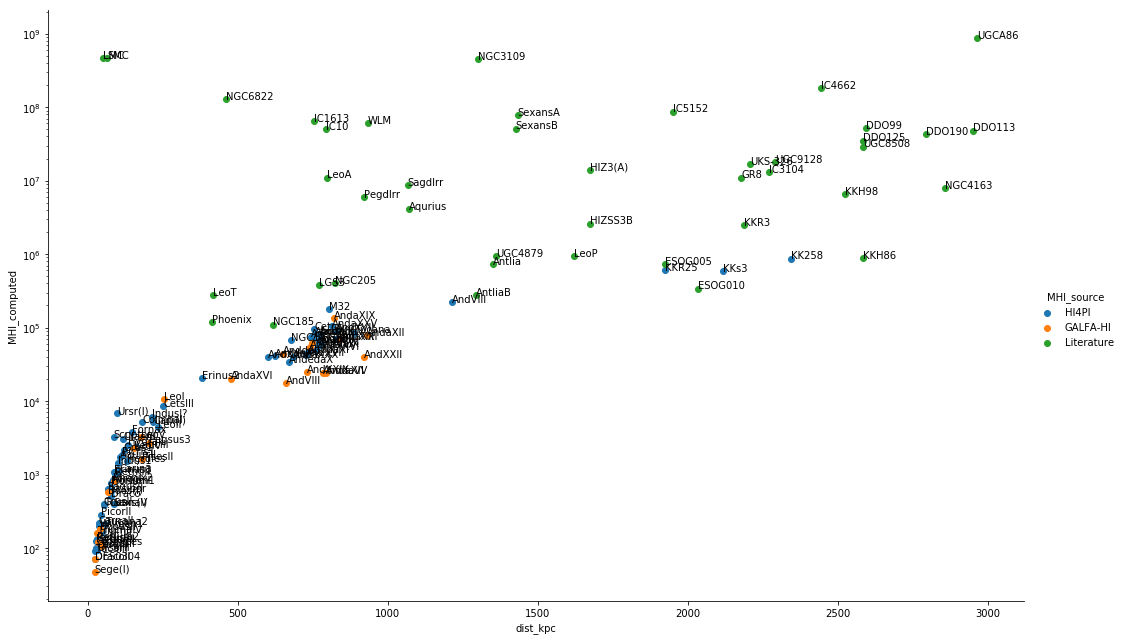

In [212]:
#linear log with labels
fg = sb.FacetGrid(data=gals_merged, hue='MHI_source', height = 9,aspect=1.61)
fg.set(xscale="linear", yscale="log")
fg.map(plt.scatter, 'dist_kpc', 'MHI_computed').add_legend()
for i, txt in enumerate(gals_merged.GalaxyName):
    if((pd.notnull(gals_merged['dist_kpc'][i])) & (pd.notnull(gals_merged['MHI_computed'][i]))):
            if (len(txt) > 7):
                label = txt[0:3]+txt[-4:]
            else:
                label = txt
            plt.annotate(label,(gals_merged.dist_kpc.iat[i],gals_merged.MHI_computed.iat[i]))
plt.show()

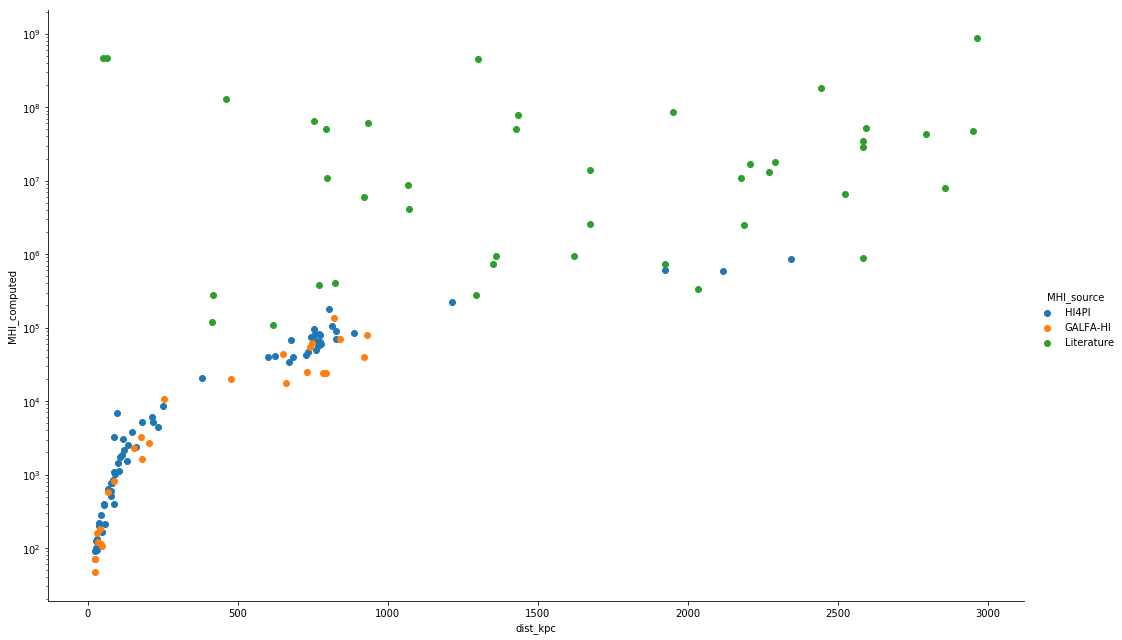

In [213]:
#linear log without labels
fg = sb.FacetGrid(data=gals_merged, hue='MHI_source', height = 9,aspect=1.61)
fg.set(xscale="linear", yscale="log")
fg.map(plt.scatter, 'dist_kpc', 'MHI_computed').add_legend()
plt.show()

# Plots: Distance vs MHI/M_star (limited to those dwarfs with M_star in McConnachie, N=92)

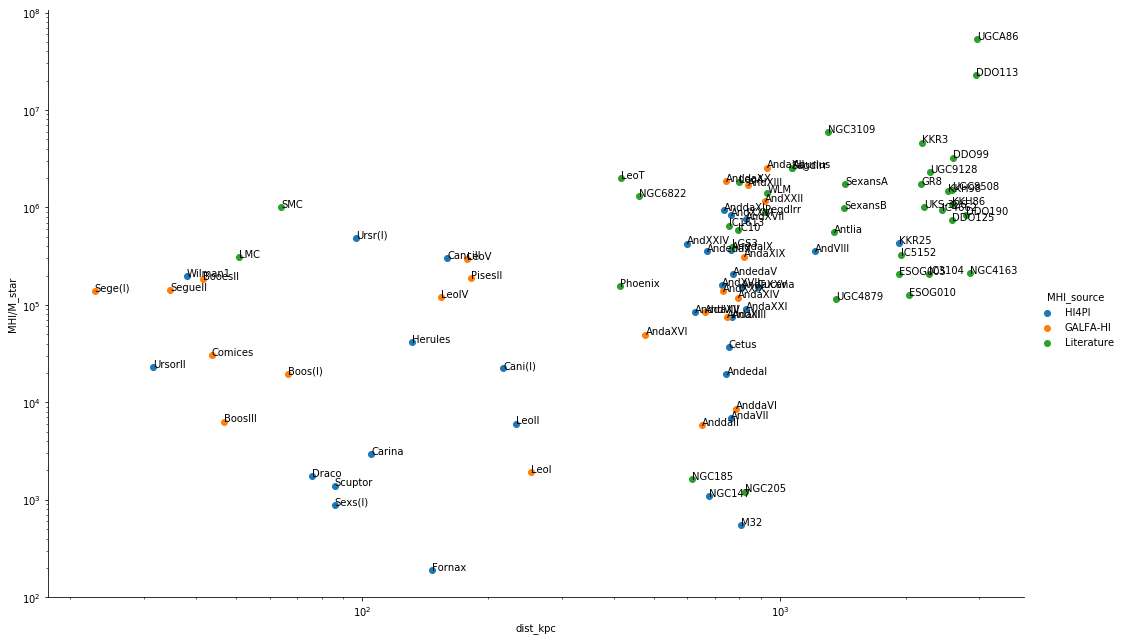

In [214]:
#normalized with labels, log-log scale
fg = sb.FacetGrid(data=gals_merged, hue='MHI_source', height = 9,aspect=1.61)
fg.set(xscale="log", yscale="log")
fg.map(plt.scatter, 'dist_kpc', 'MHI/M_star').add_legend()
#print(gals_merged.count())
count = 0
for i, txt in enumerate(gals_merged.GalaxyName):
    #print(i,gals_merged['GalaxyName'][i],txt)
    if((pd.notnull(gals_merged['dist_kpc'][i])) & (pd.notnull(gals_merged['MHI/M_star'][i]))):
            count = count + 1
            #print(i,txt,gals_merged['dist_kpc'][i],gals_merged['MHI_computed'][i],gals_merged['GalaxyName'][i])
            #label = txt[0:3]
            if (len(txt) > 7):
                label = txt[0:3]+txt[-4:]
            else:
                label = txt
            plt.annotate(label,(gals_merged['dist_kpc'].iat[i],gals_merged['MHI/M_star'].iat[i]))
plt.show()

In [215]:
count

92

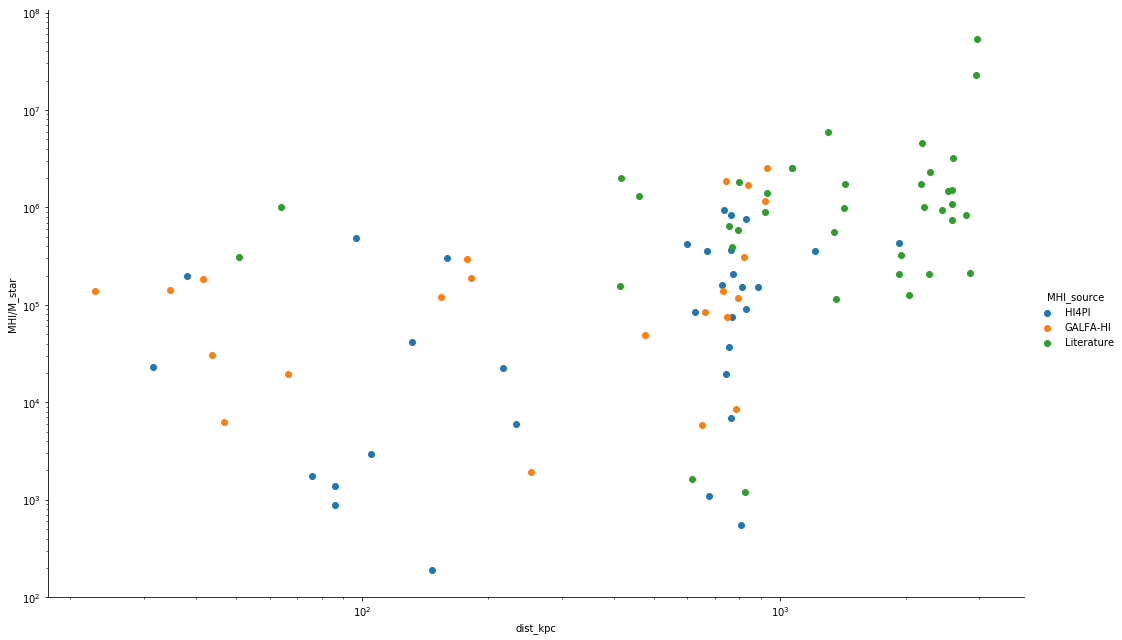

In [216]:
#normalized no labels, log-log scale
fg = sb.FacetGrid(data=gals_merged, hue='MHI_source', height = 9,aspect=1.61)
fg.set(xscale="log", yscale="log")
fg.map(plt.scatter, 'dist_kpc', 'MHI/M_star').add_legend()
plt.show()

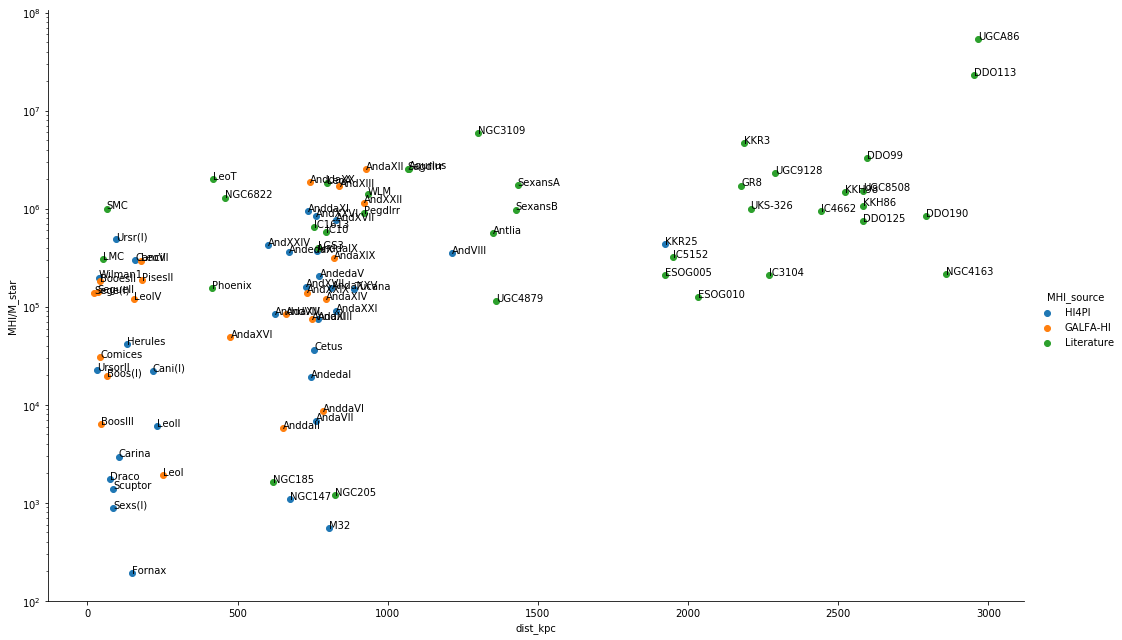

In [217]:
#normalized with labels, ylog only scale
fg = sb.FacetGrid(data=gals_merged, hue='MHI_source', height = 9,aspect=1.61)
fg.set(xscale="linear", yscale="log")
fg.map(plt.scatter, 'dist_kpc', 'MHI/M_star').add_legend()
#print(gals_merged.count())
for i, txt in enumerate(gals_merged.GalaxyName):
    #print(i,gals_merged['GalaxyName'][i],txt)
    if((pd.notnull(gals_merged['dist_kpc'][i])) & (pd.notnull(gals_merged['MHI/M_star'][i]))):
            #print(i,txt,gals_merged['dist_kpc'][i],gals_merged['MHI_computed'][i],gals_merged['GalaxyName'][i])
            #label = txt[0:3]
            if (len(txt) > 7):
                label = txt[0:3]+txt[-4:]
            else:
                label = txt
            plt.annotate(label,(gals_merged['dist_kpc'].iat[i],gals_merged['MHI/M_star'].iat[i]))
plt.show()

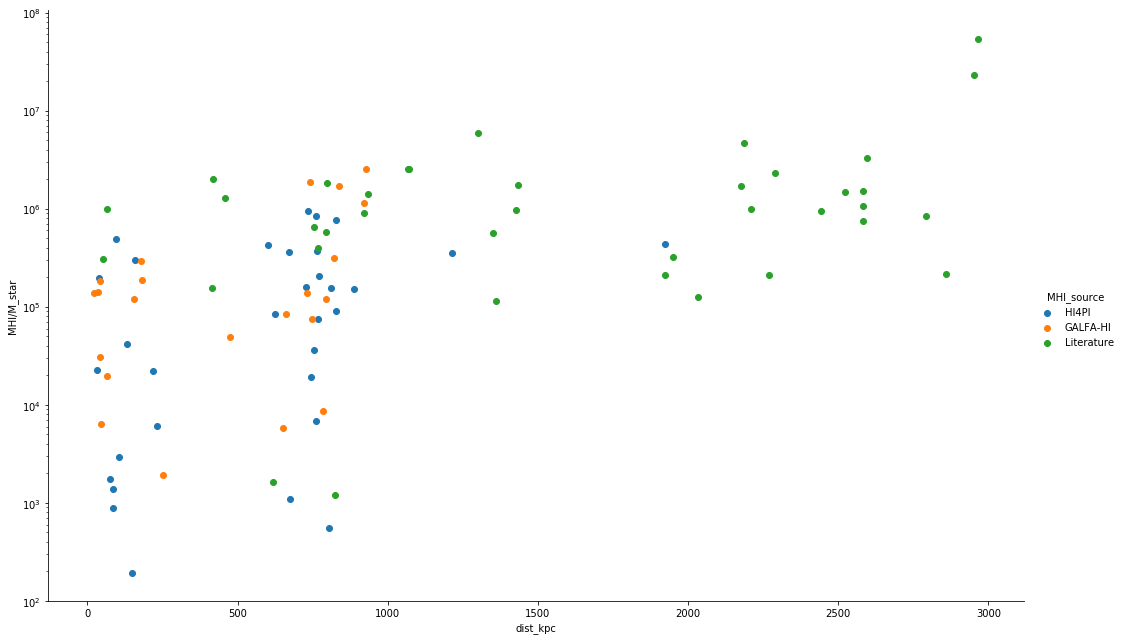

In [218]:
#normalized no labels, ylog only scale
fg = sb.FacetGrid(data=gals_merged, hue='MHI_source', height = 9,aspect=1.61)
fg.set(xscale="linear", yscale="log")
fg.map(plt.scatter, 'dist_kpc', 'MHI/M_star').add_legend()
plt.show()

TypeError: __init__() got an unexpected keyword argument 'ax'

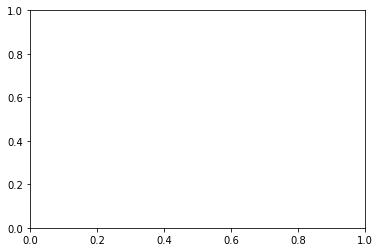

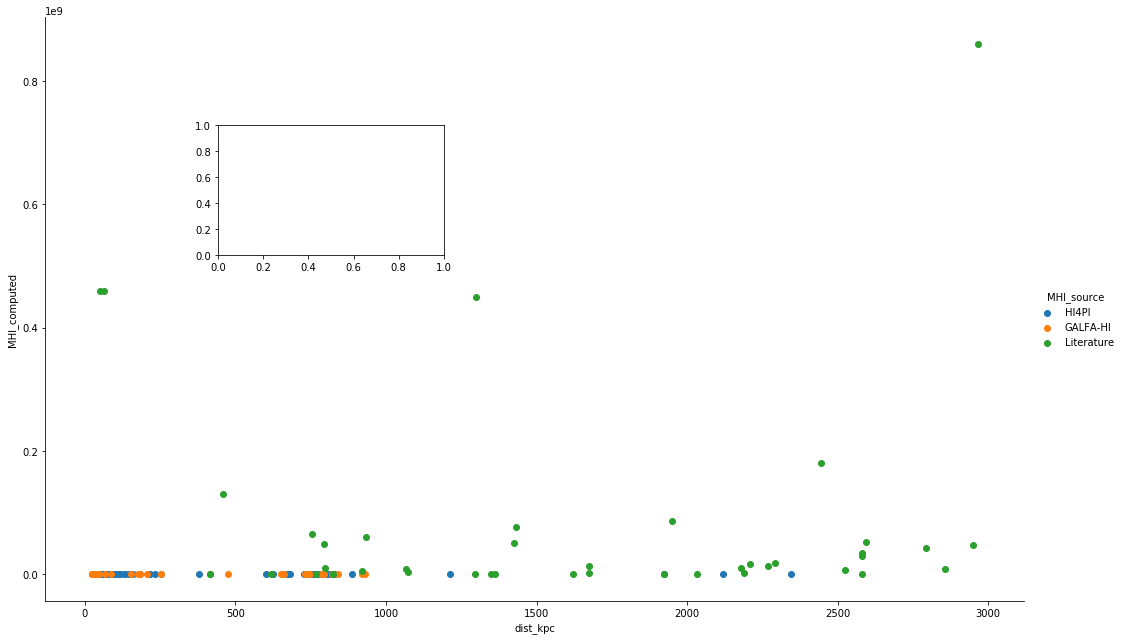

In [219]:
#inset experimentation
fg, ax = plt.subplots()
fg = sb.FacetGrid(data=gals_merged, hue='MHI_source', height = 9, aspect=1.61)
fg.map(plt.scatter, 'dist_kpc', 'MHI_computed').add_legend()
#fg.set(xscale="log", yscale="log")

ax2 = plt.axes([0.2, 0.6, .2, .2])

sb.FacetGrid(data=gals_merged, hue='MHI_source', ax=ax2)
ax2.map(plt.scatter, 'dist_kpc', 'MHI_computed')

ax2.set_title('Andromeda Dwarfs')
ax2.set(xscale="log", yscale="log")
ax2.set_xlim([100,10000])
ax2.set_ylim([10000,1000000])


# Local Group surface distance plots (N=135)

In [61]:
#Read in Adrian's values for distances & LG surface
dwarfs_ell = pd.read_csv("./dwarfs_ell_orbits.csv" ,header=(0))
dwarfs_ell.columns

Index(['id', 'GalaxyName', 'RA_hr', 'RA_min', 'RA_sec', 'Dec_deg',
       'Dec_arcmin', 'Dec_arcsec', 'EB-V', 'm-M', 'm-M_err', 'vh(km/s)',
       'Vmag', 'Vmag_err', 'PA', 'e=1-b/a', 'muVo', 'rh(')', 'rh_err_pos',
       'rh_err_neg', 'vsig_s', 'vsig_err', 'vrot_s', 'vrot_s_err',
       'MHI_mcconnachie', 'Data', 'Key', 'vsig_g', 'vsig_g_err', 'vrot_g',
       'Notes', 'dist_kpc', 'MHI_computed', 'MHI_source', 'MHI_type', '1sigma',
       'notes/image/limit', 'r_ell_m1.2_rs15', 'ell_surf_dist_m1.2_rs15',
       'r_ell_m1.0_rs20', 'ell_surf_dist_m1.0_rs20', 'r_ell_m1.5_rs15',
       'ell_surf_dist_m1.5_rs15', 'r_ell_m1.0_rs25', 'ell_surf_dist_m1.0_rs25',
       'r_ell_m1.0_rs15', 'ell_surf_dist_m1.0_rs15', 'r_ell_m1.5_rs20',
       'ell_surf_dist_m1.5_rs20', 'r_ell_m1.5_rs25', 'ell_surf_dist_m1.5_rs25',
       'r_ell_m1.2_rs25', 'ell_surf_dist_m1.2_rs25', 'r_ell_m1.2_rs20',
       'ell_surf_dist_m1.2_rs20', 'mw_dist', 'm31_dist', 'r_per', 'r_per_err',
       'r_apo', 'r_apo_err', 'rho_

In [62]:
#merge values into master df
gals_merged = pd.merge(gals_merged, dwarfs_ell[['GalaxyName','r_ell_m1.2_rs15', 'ell_surf_dist_m1.2_rs15',
       'r_ell_m1.0_rs20', 'ell_surf_dist_m1.0_rs20', 'r_ell_m1.5_rs15',
       'ell_surf_dist_m1.5_rs15', 'r_ell_m1.0_rs25', 'ell_surf_dist_m1.0_rs25',
       'r_ell_m1.0_rs15', 'ell_surf_dist_m1.0_rs15', 'r_ell_m1.5_rs20',
       'ell_surf_dist_m1.5_rs20', 'r_ell_m1.5_rs25', 'ell_surf_dist_m1.5_rs25',
       'r_ell_m1.2_rs25', 'ell_surf_dist_m1.2_rs25', 'r_ell_m1.2_rs20',
       'ell_surf_dist_m1.2_rs20', 'mw_dist', 'm31_dist', 'r_per', 'r_per_err',
       'r_apo', 'r_apo_err', 'rho_cgm_est', 'rho_cgm_est_err']], how='left', on='GalaxyName')

In [63]:
gals_merged.columns

Index(['GalaxyName', 'RA_hr', 'RA_min', 'RA_sec', 'Dec_deg', 'Dec_arcmin',
       'Dec_arcsec', 'EB-V', 'm-M', 'm-M_err_pos', 'm-M_err_neg', 'vh(km/s)',
       'Vmag', 'Vmag_err_pos', 'Vmag_err_neg', 'PA', 'e=1-b/a', 'muVo',
       'rh(')', 'rh_err_pos', 'rh_err_neg', 'vsig_s', 'vsig_err_pos',
       'vsig_err_neg', 'vrot_s', 'vrot_s_err_pos', 'vrot_s_err_neg', 'MHI',
       'Data', 'Key', 'vsig_g', 'vsig_g_err_pos', 'vsig_g_err_neg', 'vrot_g',
       'note', 'M-m', 'Notes', 'ra', 'dec', 'dist_pc', 'dist_kpc', 'dist_mpc',
       'MHI_computed', 'MHI_source', 'MHI_type', '1sigma', 'rh_subtable',
       'MHI_method', 'npix', 'GUU', 'GRU', 'HUU', 'HRU', 'GNV', 'HNV', 'LIT',
       '1sigma_GUU', '1sigma_GRU', '1sigma_HUU', '1sigma_HRU', '1sigma_GNV',
       '1sigma_HNV', 'M_star', 'M_dyn_r_h', 'm-M_err', 'Vmag_err', 'vsig_err',
       'MHI_mcconnachie', 'vsig_g_err', 'MHI/M_star', 'MHI/M_dyn',
       'r_ell_m1.2_rs15', 'ell_surf_dist_m1.2_rs15', 'r_ell_m1.0_rs20',
       'ell_surf_dist_m1.

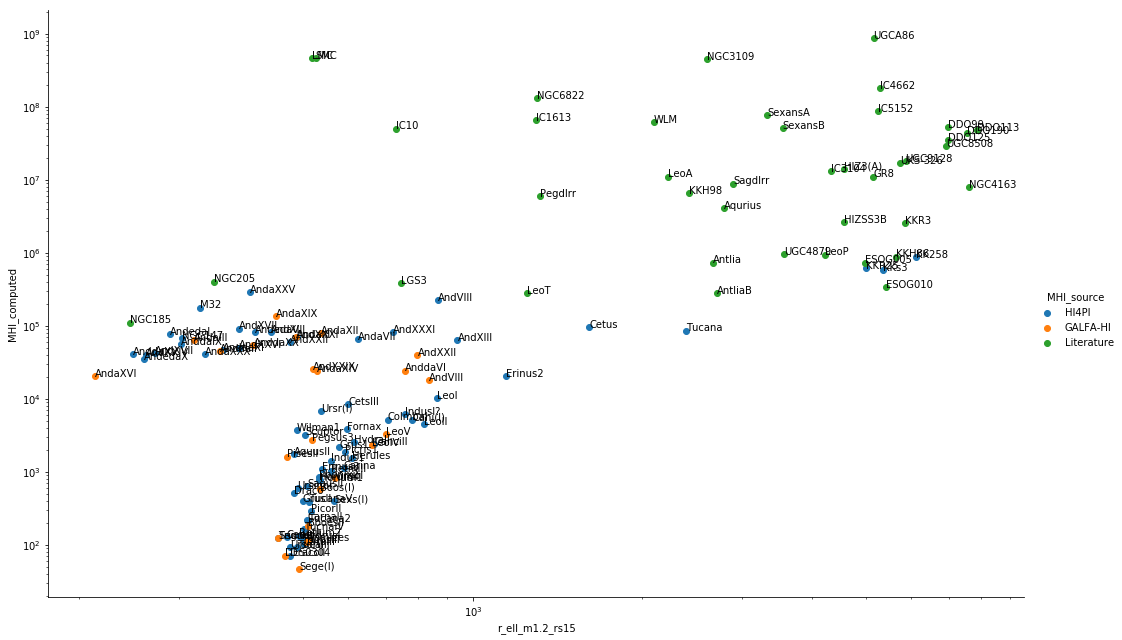

In [64]:
#MHI_computed vs r_ell, with labels log log
fg = sb.FacetGrid(data=gals_merged, hue='MHI_source', height = 9,aspect=1.61)
fg.set(xscale="log", yscale="log")
fg.map(plt.scatter, 'r_ell_m1.2_rs15', 'MHI_computed').add_legend()
#print(gals_merged.count())
count = 0
for i, txt in enumerate(gals_merged.GalaxyName):
    
    #print(i,gals_merged['GalaxyName'][i],txt)
    if((pd.notnull(gals_merged['r_ell_m1.2_rs15'][i])) & (pd.notnull(gals_merged['MHI_computed'][i]))):
        
            #print(i,txt,gals_merged['dist_kpc'][i],gals_merged['MHI_computed'][i],gals_merged['GalaxyName'][i])
            #label = txt[0:3]
            if (len(txt) > 7):
                count = count + 1
                label = txt[0:3]+txt[-4:]
            else:
                count = count + 1
                label = txt
            plt.annotate(label,(gals_merged['r_ell_m1.2_rs15'].iat[i],gals_merged['MHI_computed'].iat[i]))
plt.show()

In [65]:
count

133

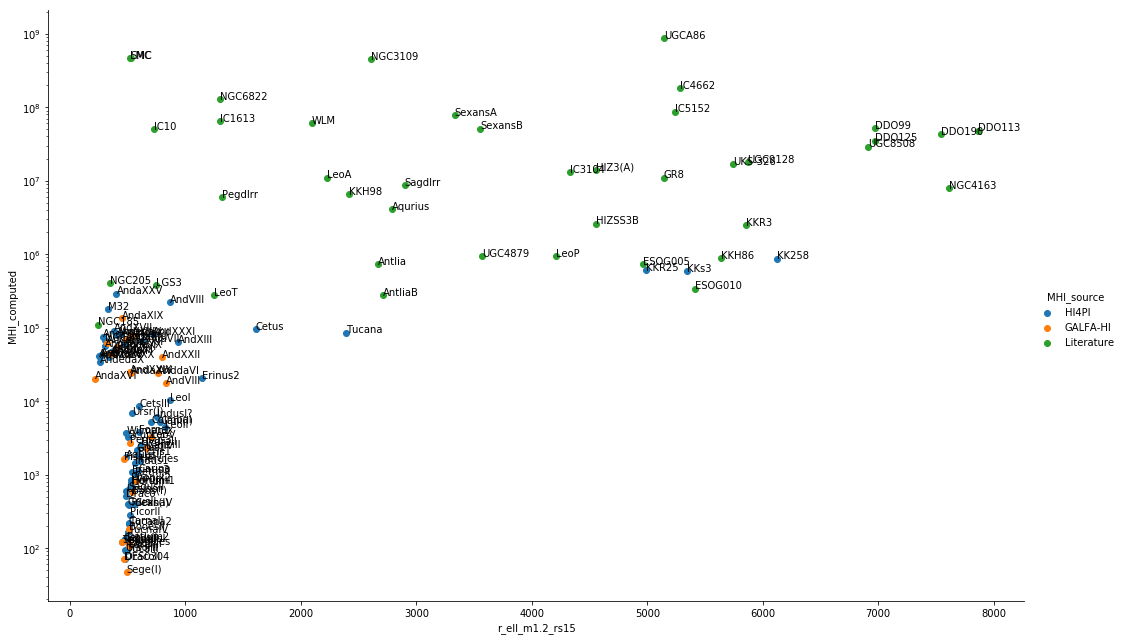

In [66]:
#MHI_computed vs r_ell, ylog only scale
fg = sb.FacetGrid(data=gals_merged, hue='MHI_source', height = 9,aspect=1.61)
fg.set(xscale="linear", yscale="log")
fg.map(plt.scatter, 'r_ell_m1.2_rs15', 'MHI_computed').add_legend()
#print(gals_merged.count())
count = 0
for i, txt in enumerate(gals_merged.GalaxyName):
    
    #print(i,gals_merged['GalaxyName'][i],txt)
    if((pd.notnull(gals_merged['r_ell_m1.2_rs15'][i])) & (pd.notnull(gals_merged['MHI_computed'][i]))):
        
            #print(i,txt,gals_merged['dist_kpc'][i],gals_merged['MHI_computed'][i],gals_merged['GalaxyName'][i])
            #label = txt[0:3]
            if (len(txt) > 7):
                count = count + 1
                label = txt[0:3]+txt[-4:]
            else:
                count = count + 1
                label = txt
            plt.annotate(label,(gals_merged['r_ell_m1.2_rs15'].iat[i],gals_merged['MHI_computed'].iat[i]))
plt.show()

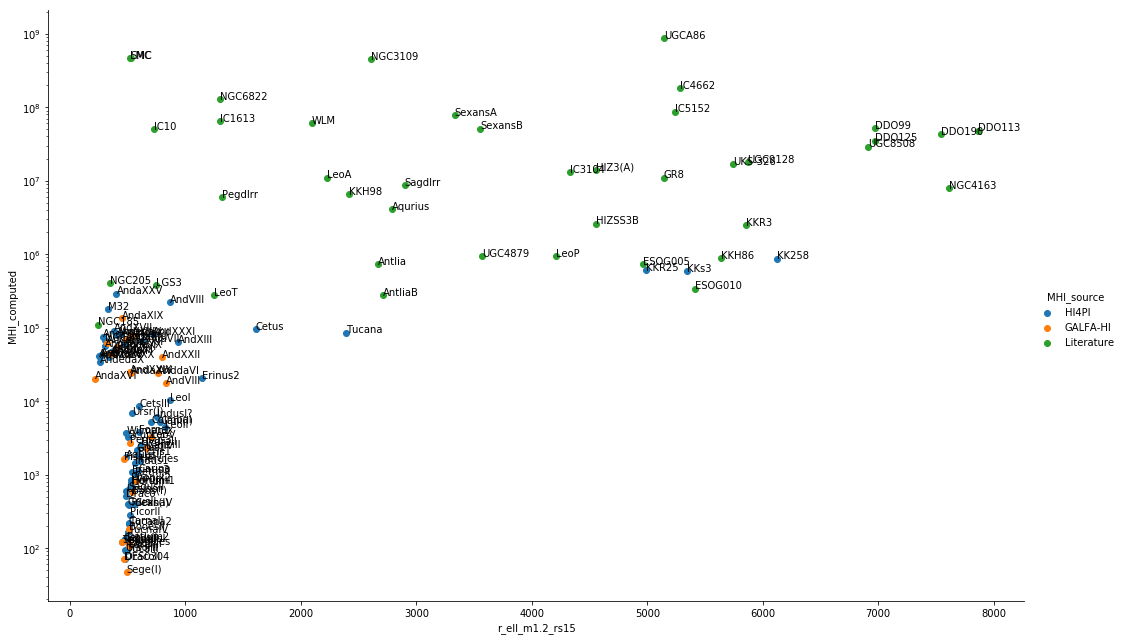

In [67]:
#MHI_computed vs r_ell, normalized with labels, ylog only scale
fg = sb.FacetGrid(data=gals_merged, hue='MHI_source', height = 9,aspect=1.61)
fg.set(xscale="linear", yscale="log")
fg.map(plt.scatter, 'r_ell_m1.2_rs15', 'MHI_computed').add_legend()
#print(gals_merged.count())
count = 0
for i, txt in enumerate(gals_merged.GalaxyName):
    
    #print(i,gals_merged['GalaxyName'][i],txt)
    if((pd.notnull(gals_merged['r_ell_m1.2_rs15'][i])) & (pd.notnull(gals_merged['MHI_computed'][i]))):
        
            #print(i,txt,gals_merged['dist_kpc'][i],gals_merged['MHI_computed'][i],gals_merged['GalaxyName'][i])
            #label = txt[0:3]
            if (len(txt) > 7):
                count = count + 1
                label = txt[0:3]+txt[-4:]
            else:
                count = count + 1
                label = txt
            plt.annotate(label,(gals_merged['r_ell_m1.2_rs15'].iat[i],gals_merged['MHI_computed'].iat[i]))
plt.show()

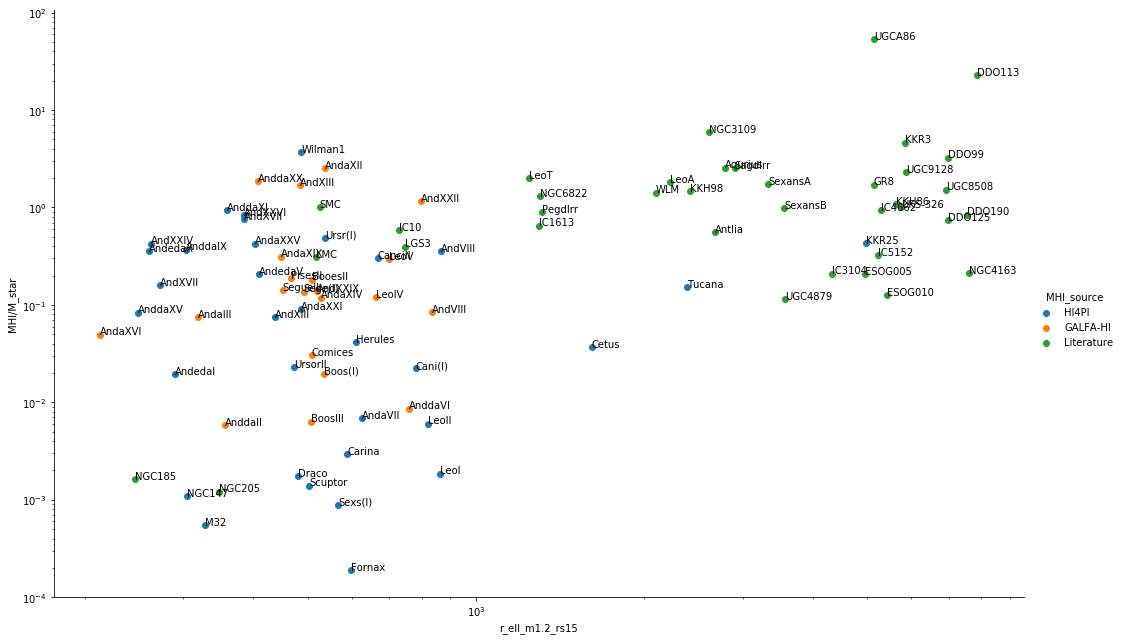

In [68]:
#MHI/M_star vs r_ell, normalized with labels, ylog only scale
fg = sb.FacetGrid(data=gals_merged, hue='MHI_source', height = 9,aspect=1.61)
fg.set(xscale="log", yscale="log")
fg.map(plt.scatter, 'r_ell_m1.2_rs15', 'MHI/M_star').add_legend()
#print(gals_merged.count())
for i, txt in enumerate(gals_merged.GalaxyName):
    #print(i,gals_merged['GalaxyName'][i],txt)
    if((pd.notnull(gals_merged['r_ell_m1.2_rs15'][i])) & (pd.notnull(gals_merged['MHI/M_star'][i]))):
            #print(i,txt,gals_merged['dist_kpc'][i],gals_merged['MHI_computed'][i],gals_merged['GalaxyName'][i])
            #label = txt[0:3]
            if (len(txt) > 7):
                label = txt[0:3]+txt[-4:]
            else:
                label = txt
            plt.annotate(label,(gals_merged['r_ell_m1.2_rs15'].iat[i],gals_merged['MHI/M_star'].iat[i]))
plt.show()

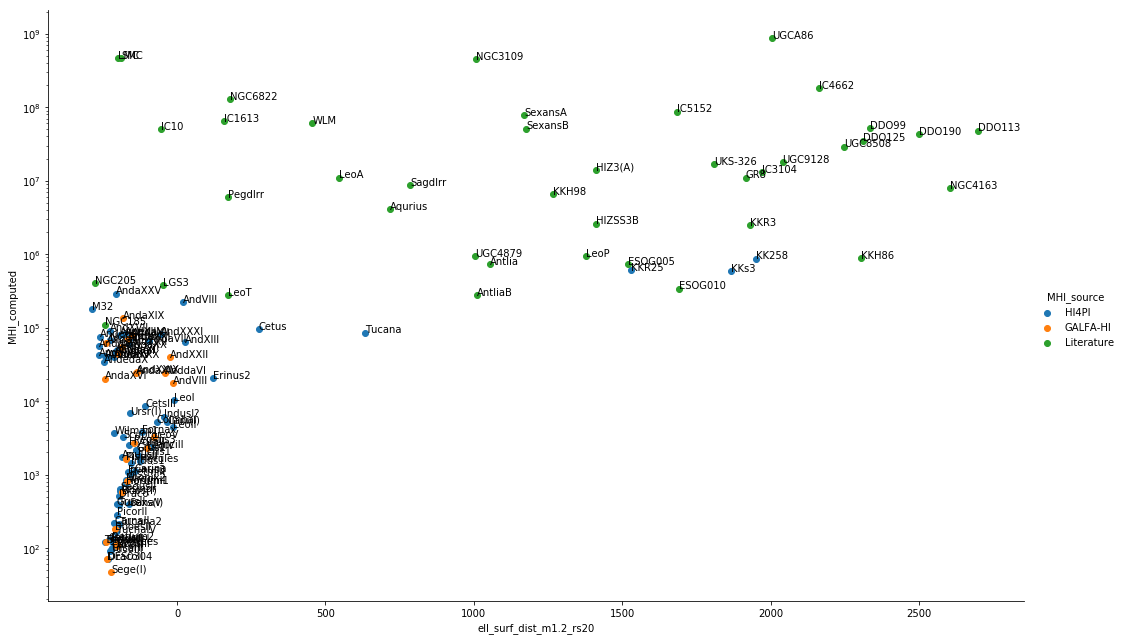

In [69]:
#r_ell, normalized with labels, ylog only scale
fg = sb.FacetGrid(data=gals_merged, hue='MHI_source', height = 9,aspect=1.61)
fg.set(xscale="linear", yscale="log")
fg.map(plt.scatter, 'ell_surf_dist_m1.2_rs20', 'MHI_computed').add_legend()
#print(gals_merged.count())
for i, txt in enumerate(gals_merged.GalaxyName):
    #print(i,gals_merged['GalaxyName'][i],txt)
    if((pd.notnull(gals_merged['ell_surf_dist_m1.2_rs20'][i])) & (pd.notnull(gals_merged['MHI_computed'][i]))):
            #print(i,txt,gals_merged['dist_kpc'][i],gals_merged['MHI_computed'][i],gals_merged['GalaxyName'][i])
            #label = txt[0:3]
            if (len(txt) > 7):
                label = txt[0:3]+txt[-4:]
            else:
                label = txt
            plt.annotate(label,(gals_merged['ell_surf_dist_m1.2_rs20'].iat[i],gals_merged['MHI_computed'].iat[i]))
plt.show()

In [85]:
gals_merged['ell_surf_log10_abs'] = np.nan

for i, ell_surf in enumerate(gals_merged['ell_surf_dist_m1.2_rs20']):
    if((pd.notnull(ell_surf))):
        if(ell_surf < 0):
            gals_merged['ell_surf_log10_abs'][i] = (-1*(np.log10(abs(ell_surf))))
        else:
            gals_merged['ell_surf_log10_abs'][i] = (np.log10(abs(ell_surf)))

/Users/janagrc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/janagrc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [86]:
gals_merged

,GalaxyName,RA_hr,RA_min,RA_sec,Dec_deg,Dec_arcmin,Dec_arcsec,EB-V,m-M,m-M_err_pos,...,ell_surf_dist_m1.2_rs20,mw_dist,m31_dist,r_per,r_per_err,r_apo,r_apo_err,rho_cgm_est,rho_cgm_est_err,ell_surf_log10_abs
0,#TheGalaxy,17.0,45.0,40.0,-29.0,0.0,28.0,9.999,99.99,9.99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,#*CanisMajor,7.0,12.0,35.0,-27.0,40.0,0.0,0.264,14.29,0.30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SagittariusdSph,18.0,55.0,19.5,-30.0,32.0,43.0,0.153,17.10,0.15,...,-230.162375,18.422411,786.989323,15.806115,1.584249,66.500621,17.271427,5.553247e-04,2.149106e-04,-2.362034
3,TucanaIII,23.0,56.0,36.0,-59.0,36.0,0.0,9.999,17.01,0.16,...,-226.383919,23.286454,783.832686,2.298244,0.304900,38.589671,1.903890,3.128814e-07,1.240942e-07,-2.354846
4,DracoII,15.0,52.0,47.6,64.0,33.0,55.0,0.016,16.90,0.30,...,-231.498355,26.199691,770.261603,19.914799,1.220011,142.520083,51.124863,6.248806e-06,2.553410e-06,-2.364548
5,Segue(I),10.0,7.0,4.0,16.0,4.0,55.0,0.031,16.80,0.20,...,-221.012411,27.892321,787.972095,19.909831,4.751758,60.688752,33.755632,1.615448e-05,6.644615e-06,-2.344417
6,Reticulum2,3.0,35.0,42.1,-54.0,2.0,57.0,9.999,17.40,0.20,...,-217.966771,31.663736,785.928755,27.693033,2.815110,67.159834,18.724026,1.504033e-05,5.646080e-06,-2.338390
7,CetusII,1.0,17.0,52.8,-17.0,25.0,12.0,9.999,17.38,0.19,...,-230.613878,32.540763,763.754893,NaN,NaN,NaN,NaN,NaN,NaN,-2.362885
8,TriangulumII,2.0,13.0,17.4,36.0,10.0,42.0,0.081,17.40,0.10,...,-244.001116,36.562203,750.391227,21.280128,8.572187,214.972959,65.729253,7.684048e-06,3.226786e-06,-2.387392
9,UrsaMajorII,8.0,51.0,30.0,63.0,7.0,48.0,0.094,17.50,0.30,...,-222.245569,37.927012,766.660880,39.134222,2.941524,161.659340,90.470868,5.187281e-05,2.103455e-05,-2.346833


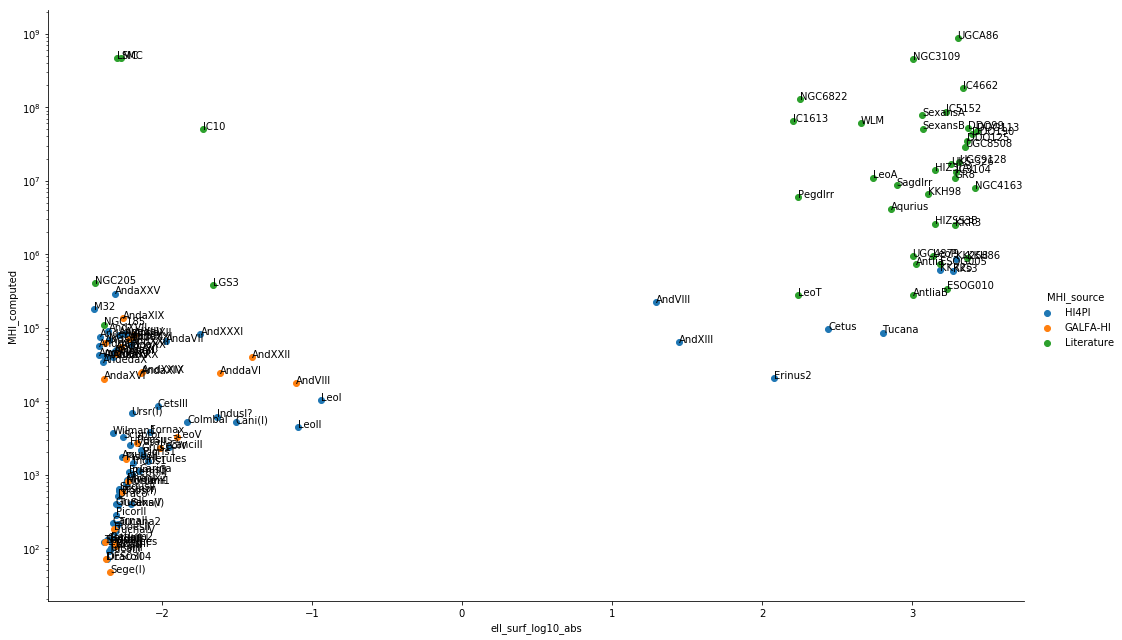

In [87]:
#r_ell, normalized with labels, ylog only scale, split at 0
fg = sb.FacetGrid(data=gals_merged, hue='MHI_source', height = 9,aspect=1.61)
fg.set(xscale="linear", yscale="log")
fg.map(plt.scatter, 'ell_surf_log10_abs', 'MHI_computed').add_legend()
#print(gals_merged.count())
for i, txt in enumerate(gals_merged.GalaxyName):
    #print(i,gals_merged['GalaxyName'][i],txt)
    if((pd.notnull(gals_merged['ell_surf_log10_abs'][i])) & (pd.notnull(gals_merged['MHI_computed'][i]))):
            #print(i,txt,gals_merged['dist_kpc'][i],gals_merged['MHI_computed'][i],gals_merged['GalaxyName'][i])
            #label = txt[0:3]
            if (len(txt) > 7):
                label = txt[0:3]+txt[-4:]
            else:
                label = txt
            plt.annotate(label,(gals_merged['ell_surf_log10_abs'].iat[i],gals_merged['MHI_computed'].iat[i]))
plt.show()

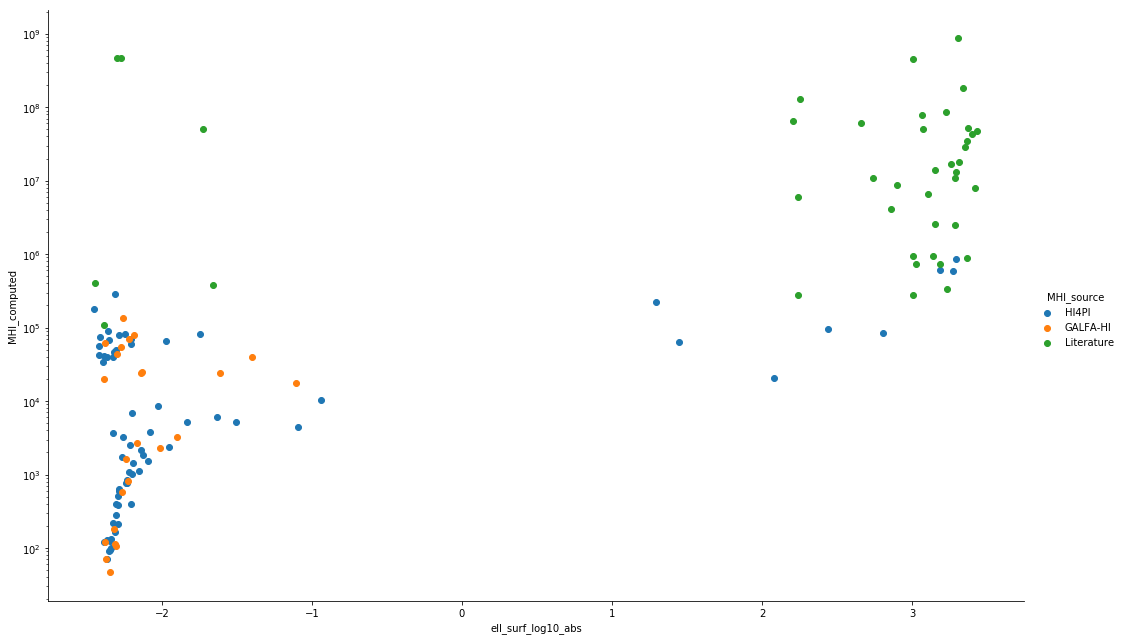

In [89]:
#r_ell, no labels, ylog only scale, split at 0
fg = sb.FacetGrid(data=gals_merged, hue='MHI_source', height = 9,aspect=1.61)
fg.set(xscale="linear", yscale="log")
fg.map(plt.scatter, 'ell_surf_log10_abs', 'MHI_computed').add_legend()
#print(gals_merged.count())
#for i, txt in enumerate(gals_merged.GalaxyName):
    #print(i,gals_merged['GalaxyName'][i],txt)
#    if((pd.notnull(gals_merged['ell_surf_log10_abs'][i])) & (pd.notnull(gals_merged['MHI_computed'][i]))):
#            #print(i,txt,gals_merged['dist_kpc'][i],gals_merged['MHI_computed'][i],gals_merged['GalaxyName'][i])
#            #label = txt[0:3]
#            if (len(txt) > 7):
#                label = txt[0:3]+txt[-4:]
#            else:
#                label = txt
#            plt.annotate(label,(gals_merged['ell_surf_log10_abs'].iat[i],gals_merged['MHI_computed'].iat[i]))
plt.show()

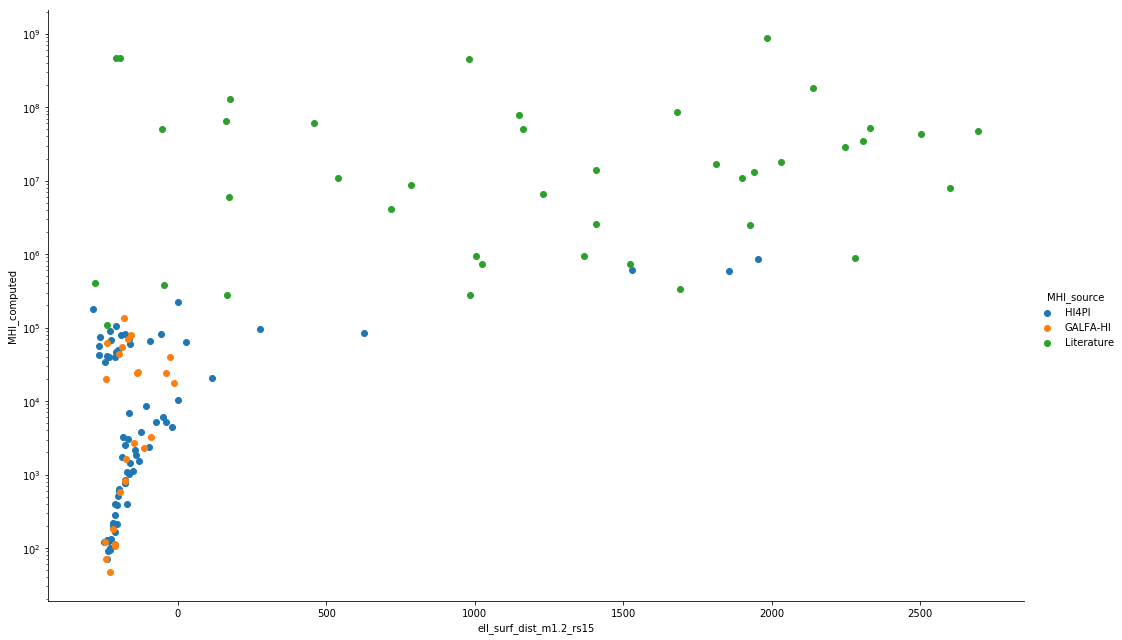

In [159]:
#r_ell, normalized with labels, ylog only scale
fg = sb.FacetGrid(data=gals_merged, hue='MHI_source', height = 9,aspect=1.61)
fg.set(xscale="linear", yscale="log")
fg.map(plt.scatter, 'ell_surf_dist_m1.2_rs15', 'MHI_computed').add_legend()
#print(gals_merged.count())
plt.show()

KeyError: "['ell_surf_dist'] not in index"

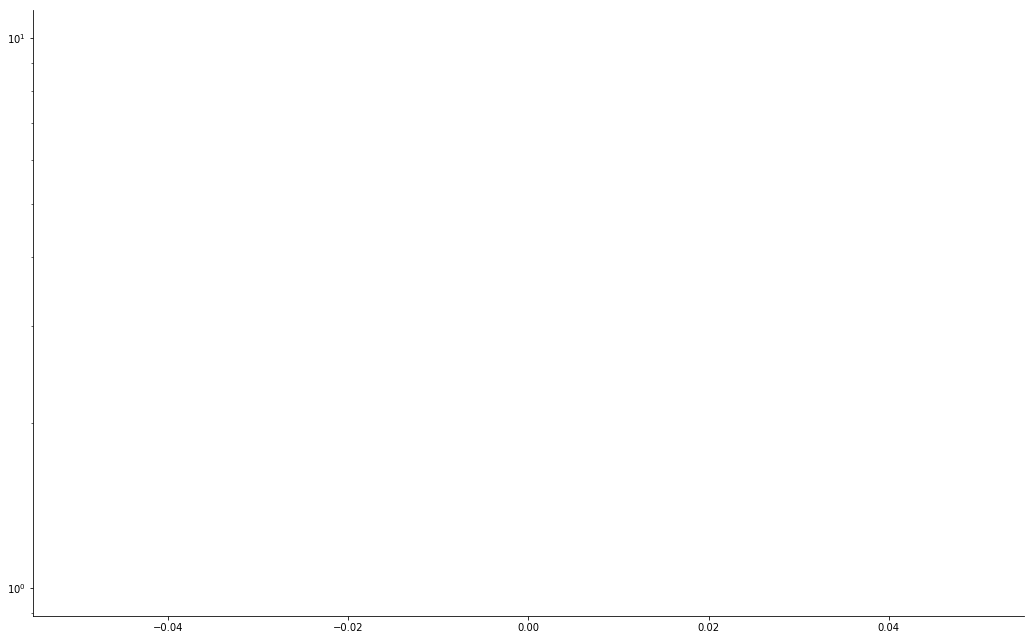

In [158]:
#ell_surf_dist, normalized with labels, ylog only scale
fg = sb.FacetGrid(data=gals_merged, hue='MHI_source', height = 9,aspect=1.61)
fg.set(xscale="linear", yscale="log")
fg.map(plt.scatter, 'ell_surf_dist', 'MHI/M_star').add_legend()
#print(gals_merged.count())
for i, txt in enumerate(gals_merged.GalaxyName):
    #print(i,gals_merged['GalaxyName'][i],txt)
    if((pd.notnull(gals_merged['ell_surf_dist'][i])) & (pd.notnull(gals_merged['MHI/M_star'][i]))):
            #print(i,txt,gals_merged['dist_kpc'][i],gals_merged['MHI_computed'][i],gals_merged['GalaxyName'][i])
            #label = txt[0:3]
            if (len(txt) > 7):
                label = txt[0:3]+txt[-4:]
            else:
                label = txt
            plt.annotate(label,(gals_merged['ell_surf_dist'].iat[i],gals_merged['MHI/M_star'].iat[i]))
plt.show()

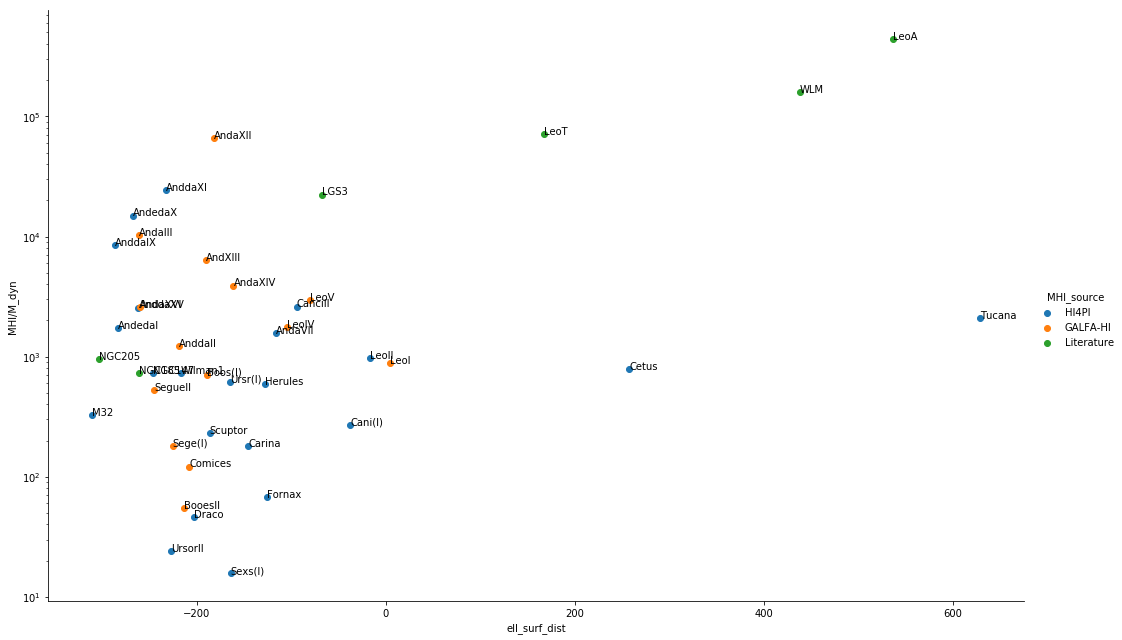

In [149]:
#MHI/M_dyn vs ell_surf_dist, normalized with labels, ylog only scale
fg = sb.FacetGrid(data=gals_merged, hue='MHI_source', height = 9,aspect=1.61)
fg.set(xscale="linear", yscale="log")
fg.map(plt.scatter, 'ell_surf_dist', 'MHI/M_dyn').add_legend()
#print(gals_merged.count())
for i, txt in enumerate(gals_merged.GalaxyName):
    #print(i,gals_merged['GalaxyName'][i],txt)
    if((pd.notnull(gals_merged['ell_surf_dist'][i])) & (pd.notnull(gals_merged['MHI/M_dyn'][i]))):
            #print(i,txt,gals_merged['dist_kpc'][i],gals_merged['MHI_computed'][i],gals_merged['GalaxyName'][i])
            #label = txt[0:3]
            if (len(txt) > 7):
                label = txt[0:3]+txt[-4:]
            else:
                label = txt
            plt.annotate(label,(gals_merged['ell_surf_dist'].iat[i],gals_merged['MHI/M_dyn'].iat[i]))
plt.show()

KeyError: "['MHI/M_star'] not in index"

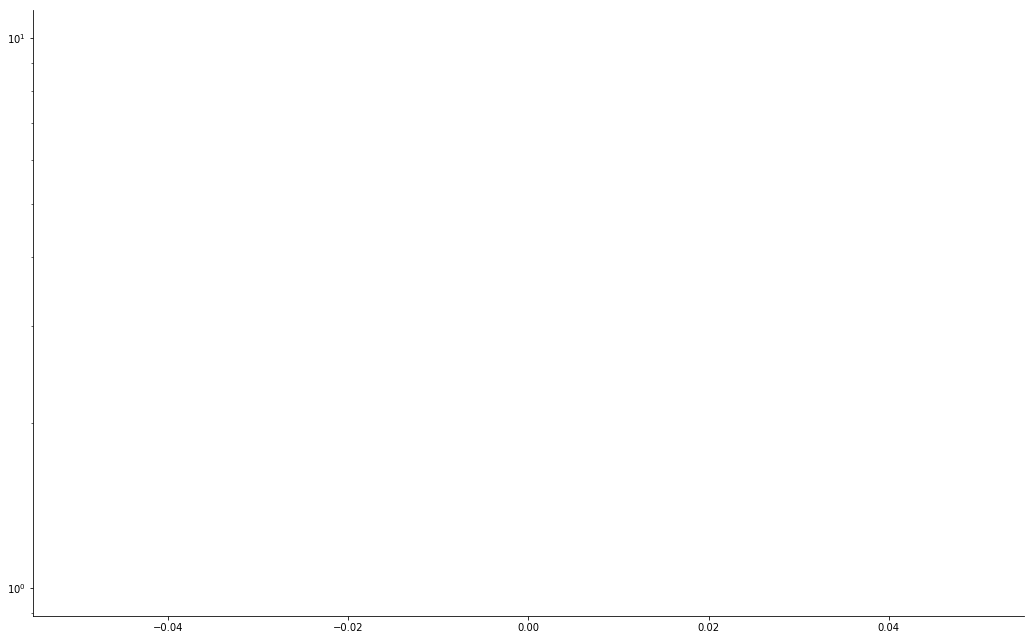

In [11]:
#ell_surf_dist, normalized with labels, ylog only scale
fg = sb.FacetGrid(data=dwarfs_ell, hue='MHI_source', height = 9,aspect=1.61)
fg.set(xscale="linear", yscale="log")
fg.map(plt.scatter, 'ell_surf_dist_m1.5_rs20', 'MHI/M_star').add_legend()
#print(gals_merged.count())
for i, txt in enumerate(dwarfs_ell.GalaxyName):
    #print(i,gals_merged['GalaxyName'][i],txt)
    if((pd.notnull(dwarfs_ell['ell_surf_dist_m1.5_rs20'][i])) & (pd.notnull(dwarfs_ell['MHI/M_star'][i]))):
            #print(i,txt,gals_merged['dist_kpc'][i],gals_merged['MHI_computed'][i],gals_merged['GalaxyName'][i])
            #label = txt[0:3]
            if (len(txt) > 7):
                label = txt[0:3]+txt[-4:]
            else:
                label = txt
            plt.annotate(label,(dwarfs_ell['ell_surf_dist_m1.5_rs20'].iat[i],dwarfs_ell['MHI/M_star'].iat[i]))
plt.show()

In [88]:
gals_merged.to_csv('/Users/janagrc/repos/dwarfs/HIdwarflimits/dwarfs.csv')

# KMeans experiment

In [39]:
galaxies.columns

Index(['GalaxyName', 'RA1', 'RA2', 'RA3', 'Dec1', 'Dec2', 'Dec3', 'M-m',
       'mystery1', 'mystery2', 'vh(km/s)_x', 'mystery3', 'mystery4', 'MHI_x',
       'Data', 'Notes', 'dist_pc', 'dist_kpc', 'dist_mpc', 'MHI_computed',
       'MHI_source', 'MHI_type', 'type_color', 'source_color', 'RA_h', 'RA_m',
       'RA_s', 'Dec_d', 'Dec_m', 'Dec_s', 'Dist', 'sig1', 'sig2', 'vh(km/s)_y',
       'MHI_y', 'r_ell', 'ell_surf_dist'],
      dtype='object')

In [40]:
galaxies[['dist_kpc','vh(km/s)_x','MHI_computed']]

,dist_kpc,vh(km/s)_x,MHI_computed
0,7.211075,87.0,NaN
1,26.302680,140.0,NaN
2,25.234808,999.9,9.189114e+01
3,23.988329,999.9,7.060196e+01
4,22.908677,208.5,9.331240e+00
5,30.199517,999.9,1.327489e+02
6,29.922646,999.9,NaN
7,30.199517,999.9,3.159340e+01
8,31.622777,-116.5,2.339303e+03
9,41.686938,-117.0,3.642430e+01


In [41]:
galaxies_kmeans = galaxies[['dist_kpc','vh(km/s)_x','MHI_computed']]
galaxies_kmeans.columns

Index(['dist_kpc', 'vh(km/s)_x', 'MHI_computed'], dtype='object')

In [42]:
galaxies_kmeans = galaxies_kmeans[galaxies_kmeans['vh(km/s)_x'] != 999.9]

In [43]:
galaxies_kmeans = galaxies_kmeans.dropna()

In [44]:
galaxies_kmeans = galaxies_kmeans[galaxies_kmeans['MHI_computed'] < 1e8]

In [45]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6)
kmeans.fit(galaxies_kmeans)
y_kmeans = kmeans.predict(galaxies_kmeans)

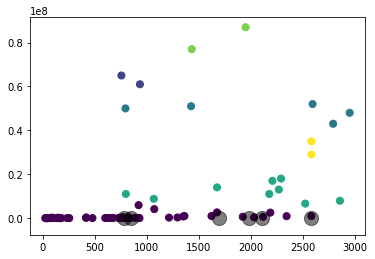

In [46]:
plt.scatter(galaxies_kmeans['dist_kpc'],galaxies_kmeans['MHI_computed'], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

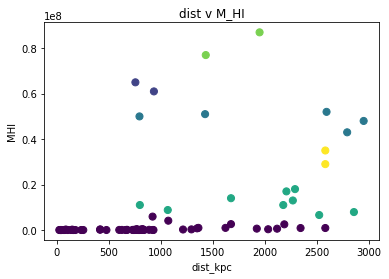

In [47]:
plt.scatter(galaxies_kmeans['dist_kpc'],galaxies_kmeans['MHI_computed'], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
#plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
#plt.yscale('log')
plt.xlabel('dist_kpc')
plt.ylabel('MHI')
plt.title('dist v M_HI')
plt.show()
#ax.labels

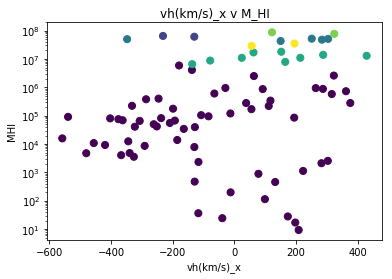

In [59]:
plt.scatter(galaxies_kmeans['vh(km/s)_x'],galaxies_kmeans['MHI_computed'], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.yscale('log')
plt.xlabel('vh(km/s)_x')
plt.ylabel('MHI')
plt.title('vh(km/s)_x v M_HI')
plt.show()
#ax.labels

In [60]:
galaxies.columns

Index(['GalaxyName', 'RA1', 'RA2', 'RA3', 'Dec1', 'Dec2', 'Dec3', 'M-m',
       'mystery1', 'mystery2', 'vh(km/s)_x', 'mystery3', 'mystery4', 'MHI_x',
       'Data', 'Notes', 'dist_pc', 'dist_kpc', 'dist_mpc', 'MHI_computed',
       'MHI_source', 'MHI_type', 'type_color', 'source_color', 'RA_h', 'RA_m',
       'RA_s', 'Dec_d', 'Dec_m', 'Dec_s', 'Dist', 'sig1', 'sig2', 'vh(km/s)_y',
       'MHI_y', 'r_ell', 'ell_surf_dist'],
      dtype='object')

In [56]:
galaxies['MHI_x']

0       99.90
1       99.90
2       99.90
3       99.90
4       99.90
5       99.90
6       99.90
7       99.90
8        0.00
9        0.00
10      99.90
11       0.00
12       0.00
13      99.90
14      99.90
15      99.90
16     460.00
17      99.90
18      99.90
19      99.90
20     460.00
21       0.00
22       0.00
23       0.00
24      99.90
25      99.90
26      99.90
27      99.90
28       0.22
29       0.00
        ...  
92       0.95
93       0.28
94     450.00
95      51.00
96       0.73
97      77.00
98      14.00
99       2.60
100      0.94
101      0.73
102     99.90
103      0.34
104     87.00
105      6.60
106     17.00
107     99.90
108      2.50
109     99.90
110     11.00
111     18.00
112     29.00
113     13.00
114     35.00
115    860.00
116     52.00
117    180.00
118     43.00
119      0.88
120      7.90
121     48.00
Name: MHI_x, Length: 122, dtype: float64

In [61]:
galaxies[galaxies['MHI_computed'].isnull()]

,GalaxyName,RA1,RA2,RA3,Dec1,Dec2,Dec3,M-m,mystery1,mystery2,...,Dec_d,Dec_m,Dec_s,Dist,sig1,sig2,vh(km/s)_y,MHI_y,r_ell,ell_surf_dist
0,CanisMajor,7,12,35.0,-27,40,0,14.29,0.30,0.30,...,-27,40,0,14.29,0.30,0.30,87.0,0.0,521.726269,-240.536834
1,SagittariusdSph,18,55,19.5,-30,32,43,17.10,0.15,0.15,...,-30,32,43,17.10,0.15,0.15,140.0,0.0,527.702779,-234.311090
6,CetusII,1,17,52.8,-17,25,12,17.38,0.19,0.19,...,-17,25,12,17.38,0.19,0.19,999.9,0.0,506.459098,-235.751781
12,ComaBerenices,12,26,59.0,23,54,15,18.20,0.20,0.20,...,23,54,15,18.20,0.20,0.20,98.1,0.0,546.569026,-207.672164
13,TucanaIV,0,2,55.2,-60,51,0,18.41,0.19,0.19,...,-60,51,0,18.41,0.19,0.19,999.9,0.0,539.101426,-208.632619
15,GrusII,22,4,4.8,-46,26,24,18.62,0.21,0.21,...,-46,26,24,18.62,0.21,0.21,999.9,0.0,535.595765,-207.749528
17,TucanaV,23,37,24.0,-63,16,12,18.71,0.34,0.34,...,-63,16,12,18.71,0.34,0.34,999.9,0.0,547.343952,-201.350328
19,SagittariusII,19,52,40.5,-22,4,5,19.13,0.15,0.15,...,-22,4,5,19.13,0.15,0.15,999.9,0.0,542.119538,-197.293162
23,UrsaMinor,15,9,8.5,67,13,21,19.40,0.10,0.10,...,67,13,21,19.40,0.10,0.10,-246.9,0.0,520.479499,-197.945465
24,HorologiumII,3,16,32.1,-50,1,5,19.46,0.20,0.20,...,-50,1,5,19.46,0.20,0.20,999.9,0.0,563.335104,-177.197157


Google Sheets API

In [2]:
#Google Sheets
from __future__ import print_function
import pickle
import os.path
from googleapiclient.discovery import build
from google_auth_oauthlib.flow import InstalledAppFlow
from google.auth.transport.requests import Request

In [ ]:
# The ID and range of a sample spreadsheet.
SAMPLE_SPREADSHEET_ID = '1BxiMVs0XRA5nFMdKvBdBZjgmUUqptlbs74OgvE2upms'
SAMPLE_RANGE_NAME = 'Class Data!A2:E'

In [ ]:
from __future__ import print_function
import pickle
import os.path
from googleapiclient.discovery import build
from google_auth_oauthlib.flow import InstalledAppFlow
from google.auth.transport.requests import Request

# If modifying these scopes, delete the file token.pickle.
SCOPES = ['https://www.googleapis.com/auth/spreadsheets.readonly']

# The ID and range of a sample spreadsheet.
SAMPLE_SPREADSHEET_ID = '1BxiMVs0XRA5nFMdKvBdBZjgmUUqptlbs74OgvE2upms'
SAMPLE_RANGE_NAME = 'Class Data!A2:E'

def main():
    """Shows basic usage of the Sheets API.
    Prints values from a sample spreadsheet.
    """
    creds = None
    # The file token.pickle stores the user's access and refresh tokens, and is
    # created automatically when the authorization flow completes for the first
    # time.
    if os.path.exists('token.pickle'):
        with open('token.pickle', 'rb') as token:
            creds = pickle.load(token)
    # If there are no (valid) credentials available, let the user log in.
    if not creds or not creds.valid:
        if creds and creds.expired and creds.refresh_token:
            creds.refresh(Request())
        else:
            flow = InstalledAppFlow.from_client_secrets_file(
                'credentials.json', SCOPES)
            creds = flow.run_local_server(port=0)
        # Save the credentials for the next run
        with open('token.pickle', 'wb') as token:
            pickle.dump(creds, token)

    service = build('sheets', 'v4', credentials=creds)

    # Call the Sheets API
    sheet = service.spreadsheets()
    result = sheet.values().get(spreadsheetId=SAMPLE_SPREADSHEET_ID,
                                range=SAMPLE_RANGE_NAME).execute()
    values = result.get('values', [])

    if not values:
        print('No data found.')
    else:
        print('Name, Major:')
        for row in values:
            # Print columns A and E, which correspond to indices 0 and 4.
            print('%s, %s' % (row[0], row[4]))

if __name__ == '__main__':
    main()

# OLD NOTES

OLD NOTES
Sanity check on conversion factor (e.g. from all_notebooks/Unresolved Undetected.ipynb):
    
    # MHI = (2.36x10**5)(D**2 mpc)(Stot) for unresolved
x = 2.36*1e5
dmpc = dist(objname)/1e3  #mpc 
tflux = 0.030336279 #put in by hand because every table different/not exactly formatted
stot = tflux*10 #tflux always multiplied by 10km/s

#galfa: 9.1 k/Jy hi4pi: .6 jy/k
g = 1/9.1 
h = .6


MHI = x*(dmpc**2)*(stot*g) #multiply by 'h' or 'g' (hi4pi or galfa) to convert to janskys 
y = MHI
'%.5f'%(y)  #show 5 decimal points